### Importing Libraries

In [4]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.io import show
from statsmodels.tsa.stattools import adfuller

import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import warnings
import itertools

import statsmodels.api as sm
import pmdarima as pm  # for auto_arima
import numpy as npimport matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}

In [52]:
# Load and preprocess data
DataFrame = pd.read_csv('Historical Product Demand 2.csv')
DataFrame['Pandas_Datestamp'] = pd.to_datetime(DataFrame['Date'])
DataFrame['Year'] = DataFrame['Pandas_Datestamp'].dt.year
DataFrame['Month'] = DataFrame['Pandas_Datestamp'].dt.month
DataFrame.sort_values(by='Pandas_Datestamp', inplace=True)
DataFrame['Order_Demand'] = pd.to_numeric(DataFrame['Order_Demand'], errors='coerce')
Warehouse = DataFrame['Warehouse'].unique()

# Updated scaling logic
DataFrame = DataFrame.dropna()

def diff_warehouse(whse):
    """Processes and aggregates data for a specific warehouse."""
    wh_data = DataFrame.loc[DataFrame['Warehouse'] == whse].copy()  # Use .loc[] and .copy()
    wh_data['Order_Demand_Scaled'] = (wh_data['Order_Demand'] - wh_data['Order_Demand'].min()) / \
                                      (wh_data['Order_Demand'].max() - wh_data['Order_Demand'].min())
    grouped_data = wh_data.groupby(pd.Grouper(key='Pandas_Datestamp', freq='M'))['Order_Demand_Scaled'].mean()
    return grouped_data


# Example usage
for wh in Warehouse:
    warehouse_data = diff_warehouse(wh)
    print(f"\nWarehouse: {wh}")
    print(warehouse_data.head())


Warehouse: Whse_A
Pandas_Datestamp
2011-01-31     0
2011-02-28   NaN
2011-03-31   NaN
2011-04-30   NaN
2011-05-31     0
Freq: M, Name: Order_Demand_Scaled, dtype: float64

Warehouse: Whse_S
Pandas_Datestamp
2011-06-30     0
2011-07-31   NaN
2011-08-31   NaN
2011-09-30   NaN
2011-10-31   NaN
Freq: M, Name: Order_Demand_Scaled, dtype: float64

Warehouse: Whse_C
Pandas_Datestamp
2011-09-30   0
2011-10-31   0
2011-11-30   0
2011-12-31   0
2012-01-31   0
Freq: M, Name: Order_Demand_Scaled, dtype: float64

Warehouse: Whse_J
Pandas_Datestamp
2011-11-30   0
2011-12-31   0
2012-01-31   0
2012-02-29   0
2012-03-31   0
Freq: M, Name: Order_Demand_Scaled, dtype: float64


In [53]:
DataFrame.head()

Product_Code Warehouse Product_Category       Date  Order_Demand  \
44799  Product_0965    Whse_A     Category_006   2011/1/8             2   
72252  Product_1724    Whse_A     Category_003  2011/5/31           108   
8431   Product_1521    Whse_S     Category_019  2011/6/24         85000   
8432   Product_1521    Whse_S     Category_019  2011/6/24          7000   
72669  Product_1507    Whse_C     Category_019   2011/9/2          1250   

      Pandas_Datestamp  Year  Month  
44799       2011-01-08  2011      1  
72252       2011-05-31  2011      5  
8431        2011-06-24  2011      6  
8432        2011-06-24  2011      6  
72669       2011-09-02  2011      9

In [54]:
len(Warehouse)

4

In [55]:
Warehouse

array(['Whse_A', 'Whse_S', 'Whse_C', 'Whse_J'], dtype=object)

In [56]:
print("Dataset shape:", df.shape)
print("\nColumn types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Dataset shape: (1048575, 6)

Column types:
 Product_Code         object
Warehouse            object
Product_Category     object
Order_Demand        float64
Year                float64
Month               float64
dtype: object

Missing values:
 Product_Code            0
Warehouse               0
Product_Category        0
Order_Demand        10469
Year                11239
Month               11239
dtype: int64


In [20]:
print("\nSummary statistics:\n", df.describe())


Summary statistics:
        Order_Demand               Pandas_Datestamp    Year   Month
count       1038106                        1037336 1037336 1037336
mean           4936  2014-06-17 05:14:07.756175104    2014       7
min               0            2011-01-08 00:00:00    2011       1
25%              20            2013-04-05 00:00:00    2013       3
50%             300            2014-06-10 00:00:00    2014       7
75%            2000            2015-08-26 00:00:00    2015      10
max         4000000            2017-01-09 00:00:00    2017      12
std           29025                            NaN       1       3


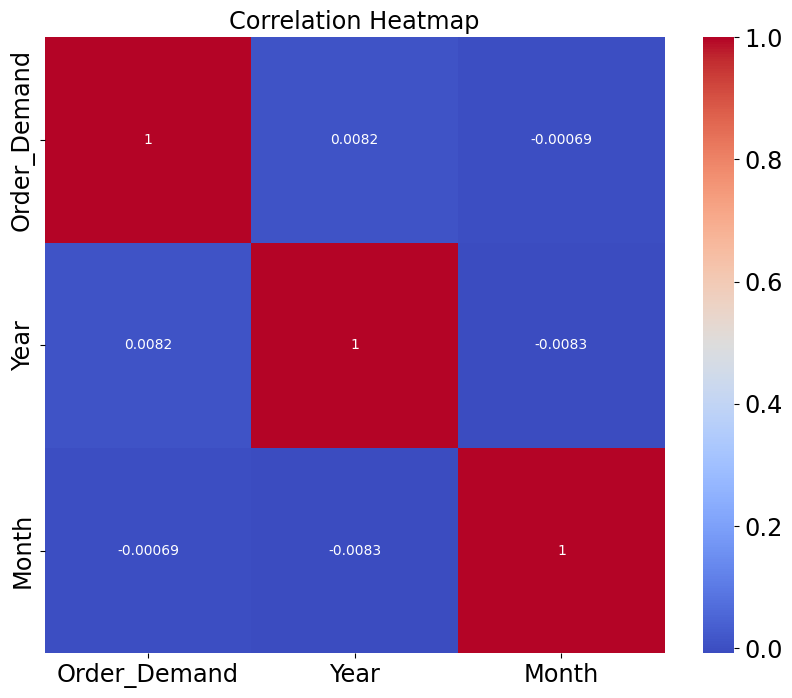

In [58]:
# 4. Multivariate analysis
# Correlation heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [65]:
print(df.columns)

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Order_Demand', 'Year',
       'Month'],
      dtype='object')


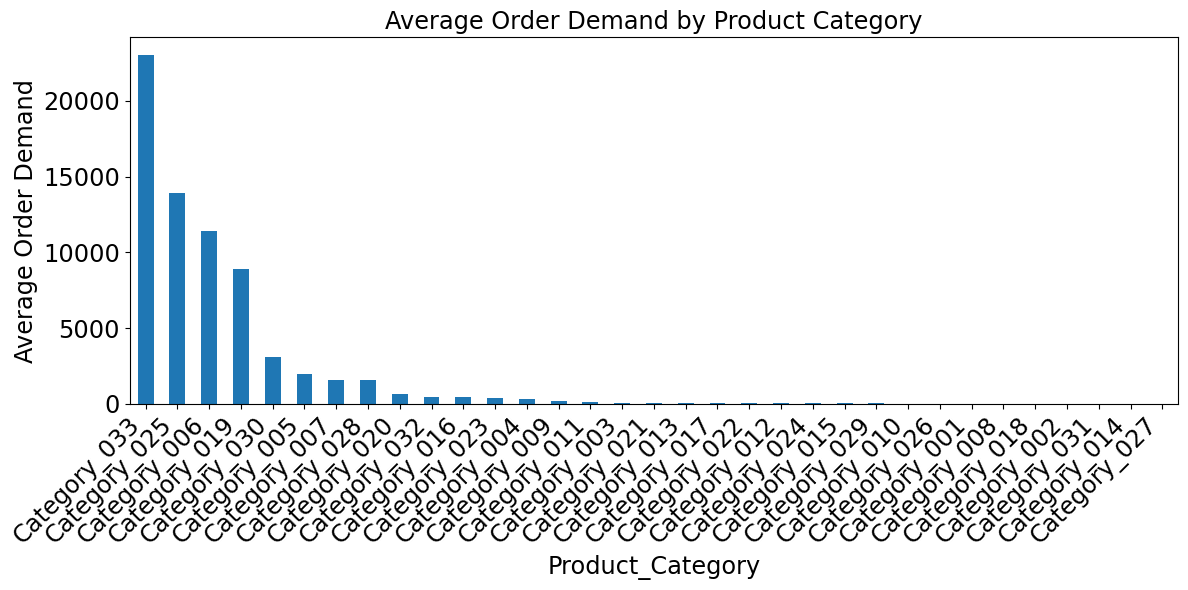

In [69]:

# 4. Categorical Data Analysis
# Bar plot of average Order_Demand by Product_Category
plt.figure(figsize=(12, 6))
df.groupby('Product_Category')['Order_Demand'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Order Demand by Product Category')
plt.ylabel('Average Order Demand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

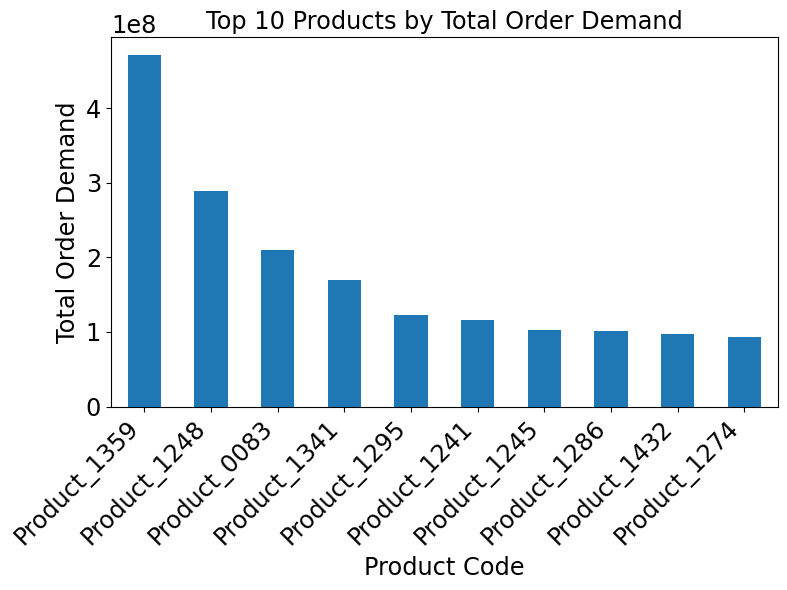

In [70]:
# 9. Top Products Analysis
top_products = df.groupby('Product_Code')['Order_Demand'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Total Order Demand')
plt.xlabel('Product Code')
plt.ylabel('Total Order Demand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

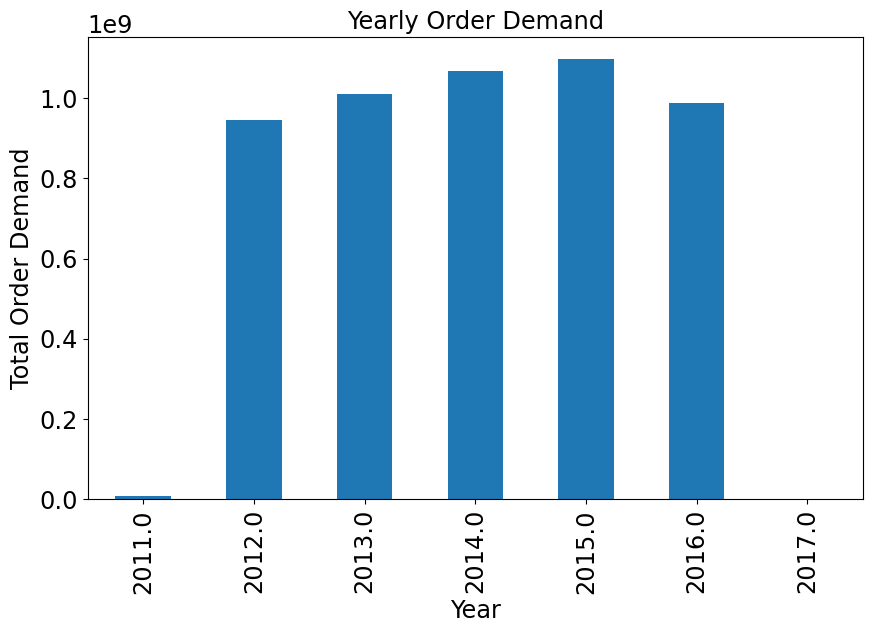

In [71]:
# 10. Year-over-Year Comparison
yearly_demand = df.groupby(df.index.year)['Order_Demand'].sum()
plt.figure(figsize=(10, 6))
yearly_demand.plot(kind='bar')
plt.title('Yearly Order Demand')
plt.xlabel('Year')
plt.ylabel('Total Order Demand')
plt.show()

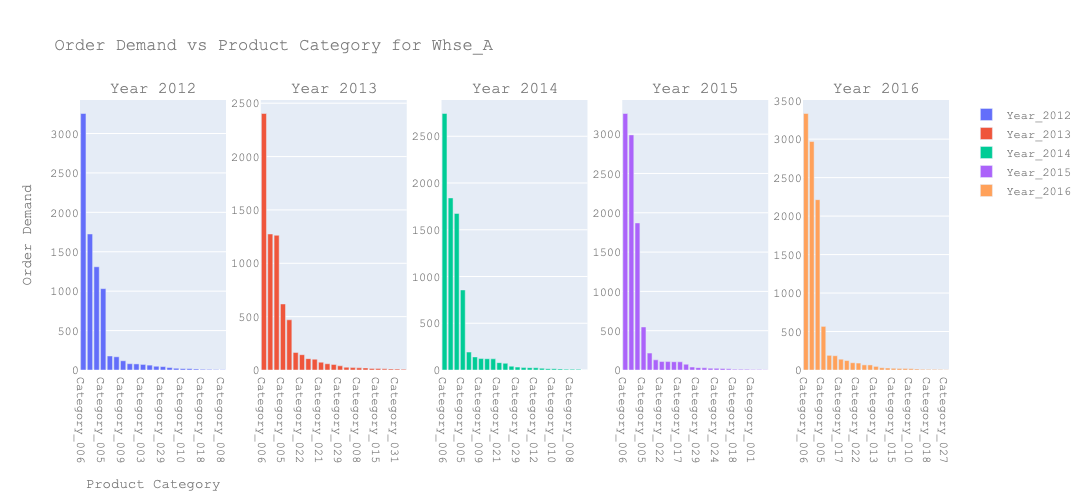

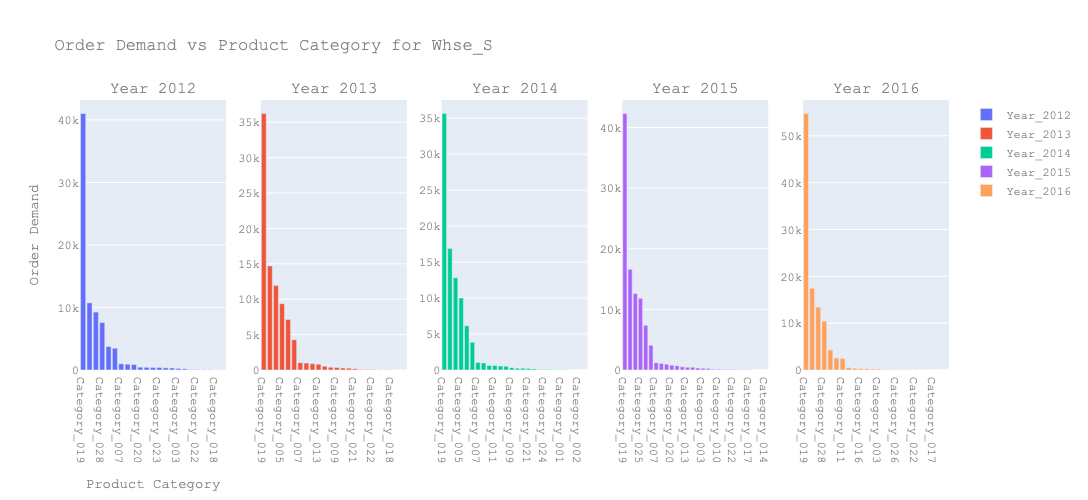

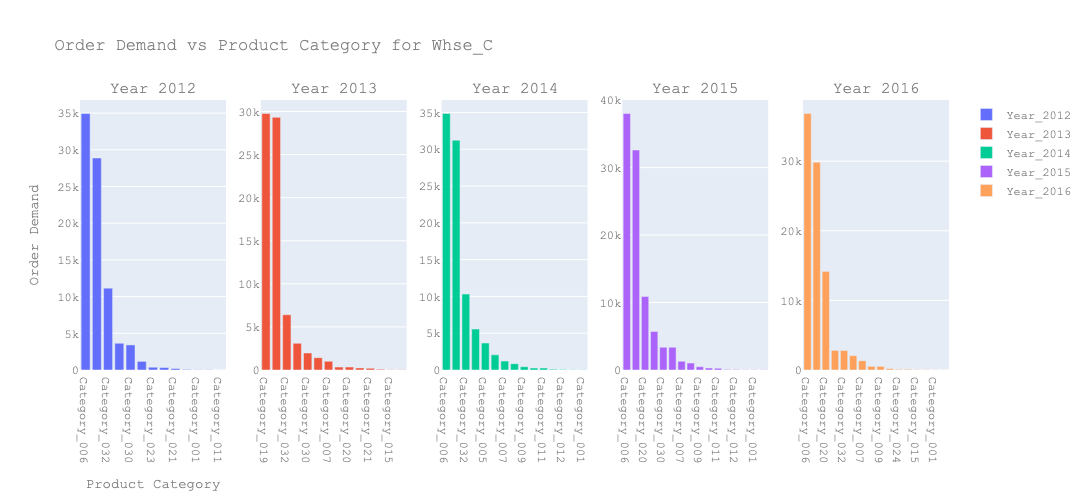

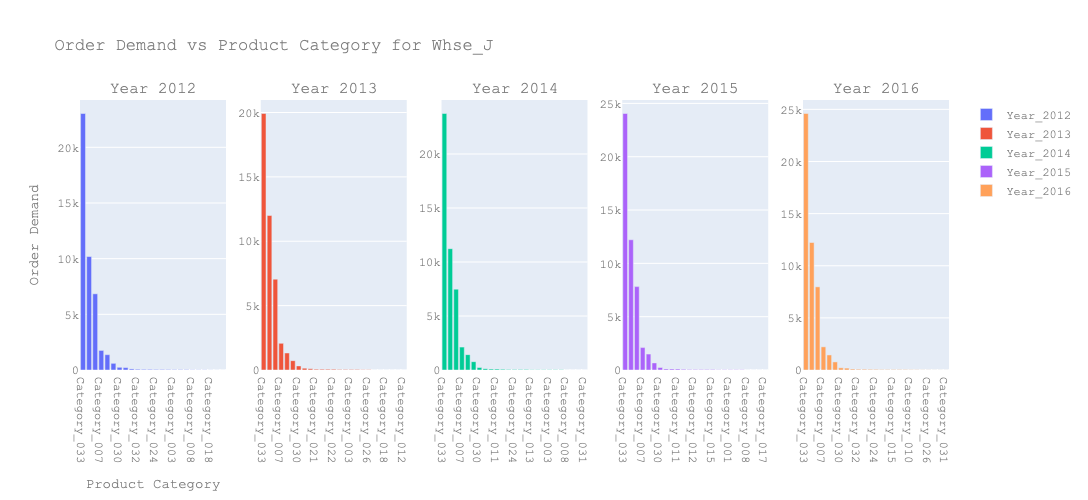

In [72]:
for warehouse in Warehouse:
    # Filter data for the current warehouse
    WH_S = df[df['Warehouse'] == warehouse]
    
    # Initialize a dictionary to store grouped data for each year
    yearly_data = {}
    
    for year in range(2012, 2017):  # Loop over years 2012-2016
        WH_S_year = WH_S[WH_S['Year'] == year]
        yearly_data[year] = WH_S_year.groupby('Product_Category', as_index=False)['Order_Demand'].mean()
        yearly_data[year] = yearly_data[year].sort_values('Order_Demand', ascending=False)
    
    # Create bar traces for each year
    traces = []
    for year in range(2012, 2017):
        traces.append(
            go.Bar(
                x=yearly_data[year]['Product_Category'],
                y=yearly_data[year]['Order_Demand'],
                name=f'Year_{year}'
            )
        )
    
    # Create subplots
    fig = make_subplots(rows=1, cols=5, subplot_titles=[f"Year {year}" for year in range(2012, 2017)])
    
    # Add traces to subplots
    for i, trace in enumerate(traces):
        fig.add_trace(trace, row=1, col=i+1)
    
    # Update layout
    fig.update_layout(
        height=500,
        width=1200,
        title=f'Order Demand vs Product Category for {warehouse}',
        xaxis_title='Product Category',
        yaxis_title='Order Demand',
        font=dict(
            family='Courier New, monospace',
            size=12,
            color='#7f7f7f'
        )
    )
    
    # Show plot
    fig.show()

In [73]:
def diff_warehouse(warehouse):
    """
    Processes and aggregates data for a specific warehouse, scales the order demand,
    and computes monthly averages along with rolling statistics.

    Args:
        warehouse (str): The warehouse identifier.

    Returns:
        pd.DataFrame: Processed data with rolling statistics.
    """
    # Filter data for the specified warehouse
    wh_data = DataFrame.loc[DataFrame['Warehouse'] == warehouse].copy()

    # Scale the Order Demand
    wh_data['Order_Demand_Scaled'] = (wh_data['Order_Demand'] - wh_data['Order_Demand'].min()) / \
                                      (wh_data['Order_Demand'].max() - wh_data['Order_Demand'].min())

    # Group by month and calculate mean order demand
    wh_data['Month'] = wh_data['Pandas_Datestamp'].dt.to_period('M')
    monthly_data = wh_data.groupby('Month')['Order_Demand_Scaled'].mean().reset_index()
    monthly_data['Month'] = monthly_data['Month'].dt.to_timestamp()

    # Add rolling average and standard deviation
    monthly_data.set_index('Month', inplace=True)
    monthly_data['MA_3'] = monthly_data['Order_Demand_Scaled'].rolling(3).mean()
    monthly_data['MA_3_std'] = monthly_data['Order_Demand_Scaled'].rolling(3).std()

    # Add warehouse identifier
    monthly_data['Warehouse'] = warehouse

    return monthly_data

In [74]:
# Example usage for a specific warehouse
warehouse_result = diff_warehouse('Whse_A')
print(warehouse_result.head())

            Order_Demand_Scaled  MA_3  MA_3_std Warehouse
Month                                                    
2011-01-01                    0   NaN       NaN    Whse_A
2011-05-01                    0   NaN       NaN    Whse_A
2011-11-01                    0     0         0    Whse_A
2011-12-01                    0     0         0    Whse_A
2012-01-01                    0     0         0    Whse_A


In [75]:
class Color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

for warehouse in Warehouse:
    print("\n" + "_" * 120)
    print(Color.BOLD + f"\n\t\t\t {warehouse} \n" + Color.END)
    print(diff_warehouse(warehouse))


________________________________________________________________________________________________________________________

			 Whse_A 

            Order_Demand_Scaled  MA_3  MA_3_std Warehouse
Month                                                    
2011-01-01                    0   NaN       NaN    Whse_A
2011-05-01                    0   NaN       NaN    Whse_A
2011-11-01                    0     0         0    Whse_A
2011-12-01                    0     0         0    Whse_A
2012-01-01                    0     0         0    Whse_A
...                         ...   ...       ...       ...
2016-08-01                    0     0         0    Whse_A
2016-09-01                    0     0         0    Whse_A
2016-10-01                    0     0         0    Whse_A
2016-11-01                    0     0         0    Whse_A
2016-12-01                    0     0         0    Whse_A

[64 rows x 4 columns]

______________________________________________________________________________________

In [92]:
def plot_original(dataframe, warehouse_name):
    """
    Plots the actual order demand, 3-period moving average, and 3-period moving standard deviation
    for a given warehouse dataset.

    Args:
        dataframe (pd.DataFrame): Dataframe containing Order_Demand_Scaled, MA_3, and MA_3_std columns.
        warehouse_name (str): Name of the warehouse for the plot title.

    Returns:
        None
    """
    # Create Scatter traces
    actual_trace = go.Scatter(
        x=dataframe.index,
        y=dataframe['Order_Demand_Scaled'],  # Adjusted to use scaled column
        mode='lines+markers',
        name='Actual'
    )
    
    ma3_trace = go.Scatter(
        x=dataframe.index,
        y=dataframe['MA_3'],
        mode='lines+markers',
        name='3-Period Moving Average'
    )
    
    ma3_std_trace = go.Scatter(
        x=dataframe.index,
        y=dataframe['MA_3_std'],
        mode='lines+markers',
        name='3-Period Moving Standard Deviation'
    )
    
    # Combine traces
    data = [actual_trace, ma3_trace, ma3_std_trace]
    
    # Layout configuration
    layout = go.Layout(
        title=f'Order Demand for {warehouse_name}',
        xaxis=dict(
            title='Years',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Order Demand (Scaled)',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    
    # Create and display the figure
    fig = go.Figure(data=data, layout=layout)
    fig.show()

In [86]:
warehouse_data = diff_warehouse('Whse_A')
print(warehouse_data.columns)


Index(['Order_Demand_Scaled', 'MA_3', 'MA_3_std', 'Warehouse'], dtype='object')


            Order_Demand_Scaled  MA_3  MA_3_std Warehouse
Month                                                    
2011-01-01                    0   NaN       NaN    Whse_A
2011-05-01                    0   NaN       NaN    Whse_A
2011-11-01                    0     0         0    Whse_A
2011-12-01                    0     0         0    Whse_A
2012-01-01                    0     0         0    Whse_A


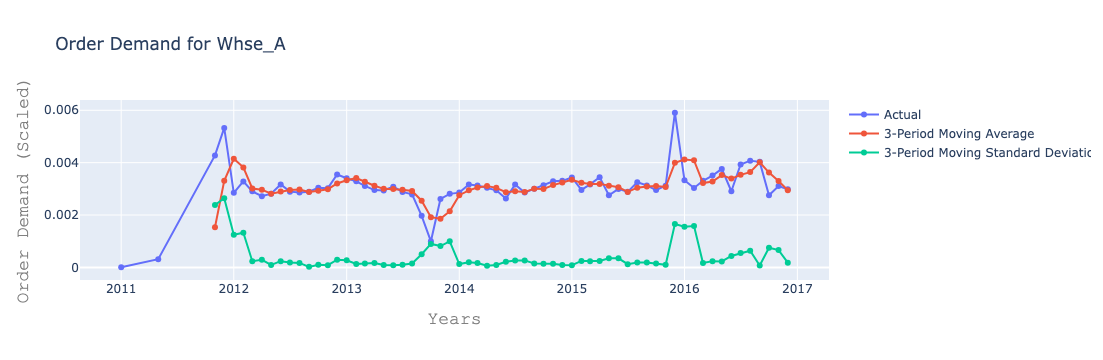

In [94]:
warehouse_name = "Whse_A"
warehouse_data = diff_warehouse(warehouse_name)  # Get processed data
print(warehouse_data.head())  # Confirm the structure
plot_original(warehouse_data, warehouse_name)

            Order_Demand_Scaled  MA_3  MA_3_std Warehouse
Month                                                    
2011-06-01                    0   NaN       NaN    Whse_S
2011-12-01                    0   NaN       NaN    Whse_S
2012-01-01                    0     0         0    Whse_S
2012-02-01                    0     0         0    Whse_S
2012-03-01                    0     0         0    Whse_S


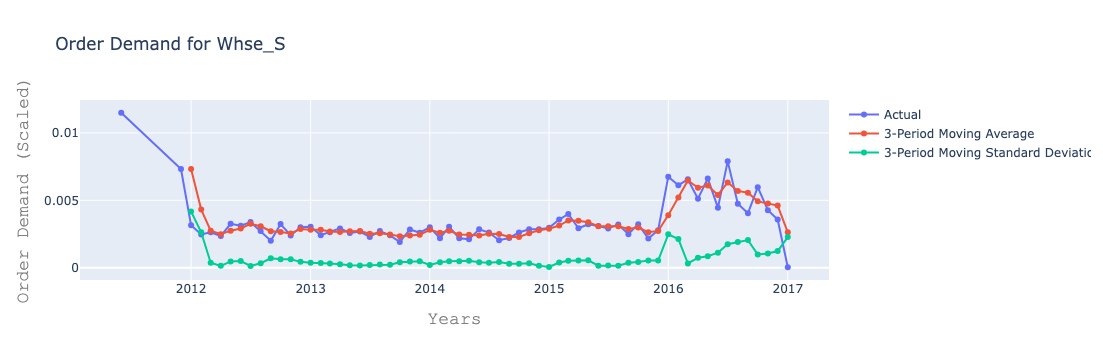

In [95]:
warehouse_name = "Whse_S"
warehouse_data = diff_warehouse(warehouse_name)  # Get processed data
print(warehouse_data.head())  # Confirm the structure
plot_original(warehouse_data, warehouse_name)

            Order_Demand_Scaled  MA_3  MA_3_std Warehouse
Month                                                    
2011-09-01                    0   NaN       NaN    Whse_C
2011-10-01                    0   NaN       NaN    Whse_C
2011-11-01                    0     0         0    Whse_C
2011-12-01                    0     0         0    Whse_C
2012-01-01                    0     0         0    Whse_C


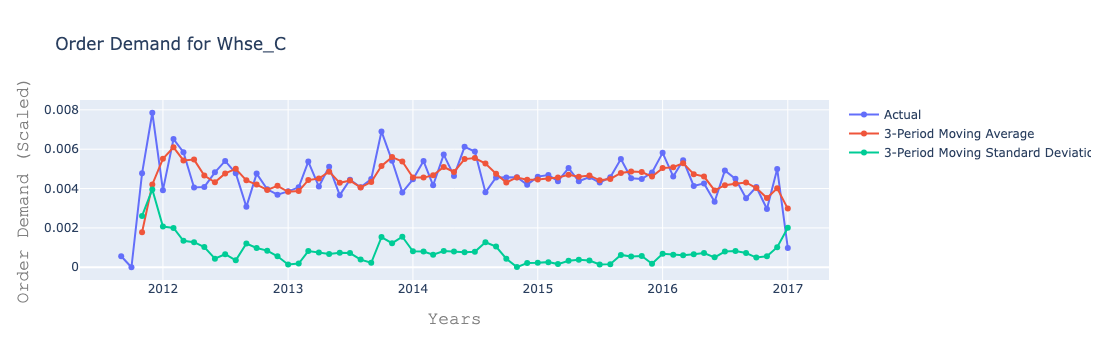

In [96]:
warehouse_name = "Whse_C"
warehouse_data = diff_warehouse(warehouse_name)  # Get processed data
print(warehouse_data.head())  # Confirm the structure
plot_original(warehouse_data, warehouse_name)

            Order_Demand_Scaled  MA_3  MA_3_std Warehouse
Month                                                    
2011-11-01                    0   NaN       NaN    Whse_J
2011-12-01                    0   NaN       NaN    Whse_J
2012-01-01                    0     0         0    Whse_J
2012-02-01                    0     0         0    Whse_J
2012-03-01                    0     0         0    Whse_J


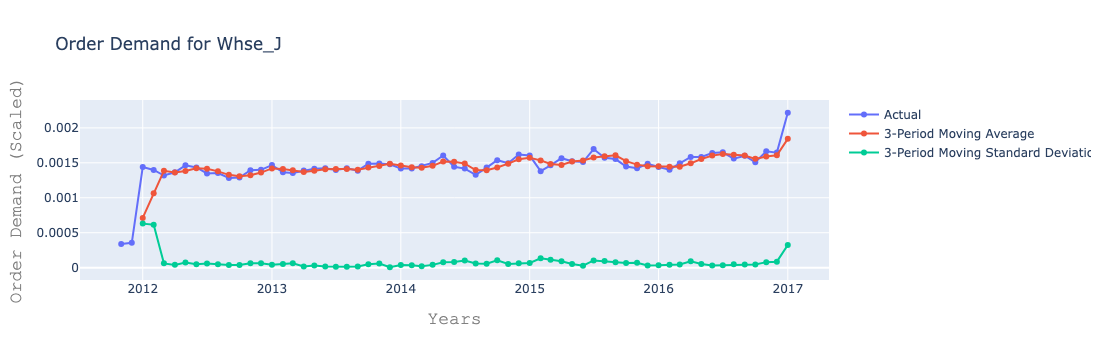

In [97]:
warehouse_name = "Whse_J"
warehouse_data = diff_warehouse(warehouse_name)  # Get processed data
print(warehouse_data.head())  # Confirm the structure
plot_original(warehouse_data, warehouse_name)

In [98]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd

def test_stationarity(timeseries):
    """
    Tests the stationarity of a time series using the Dickey-Fuller test
    and plots rolling mean and standard deviation.

    Args:
        timeseries (pd.Series): The time series to test.

    Returns:
        None
    """
    # Calculating rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plotting rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Performing Dickey-Fuller test
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries.dropna(), autolag='AIC')  # Drop NaNs for the test
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)


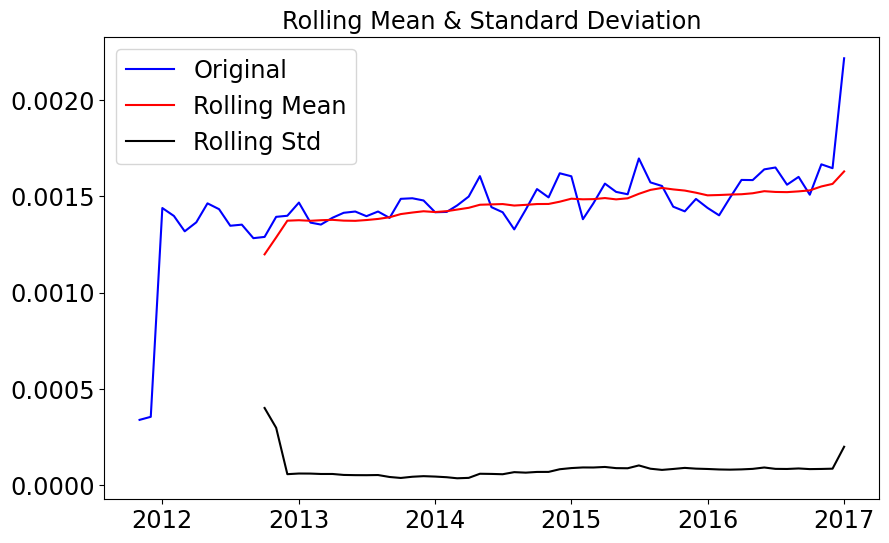

Results of Dickey-Fuller Test:
Test Statistic                -0
p-value                        1
#Lags Used                     5
Number of Observations Used   57
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [99]:
# Example usage with a time series
timeseries = warehouse_data['Order_Demand_Scaled']  # Assuming 'Order_Demand_Scaled' is the time series
test_stationarity(timeseries)


________________________________________________________________________________________________________________________


							 Whse_A 



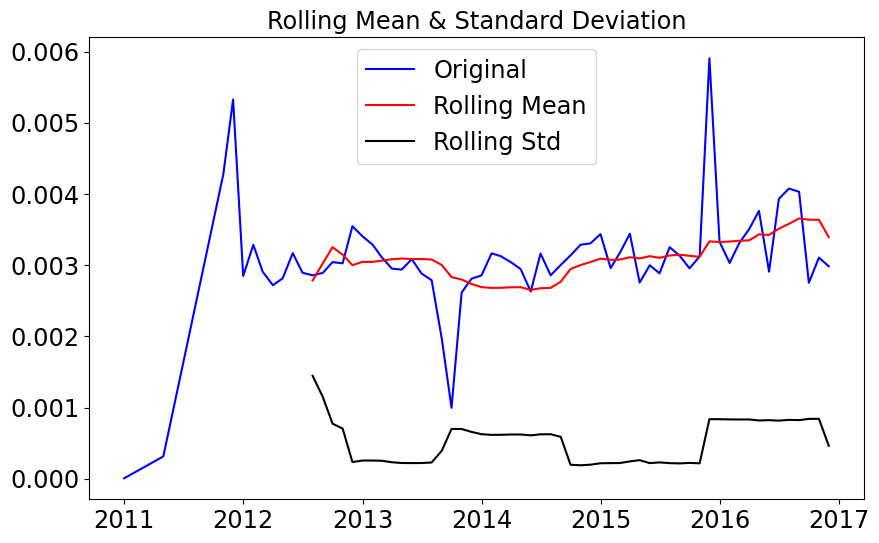

Results of Dickey-Fuller Test:
Test Statistic                -6
p-value                        0
#Lags Used                     0
Number of Observations Used   63
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64

________________________________________________________________________________________________________________________


							 Whse_S 



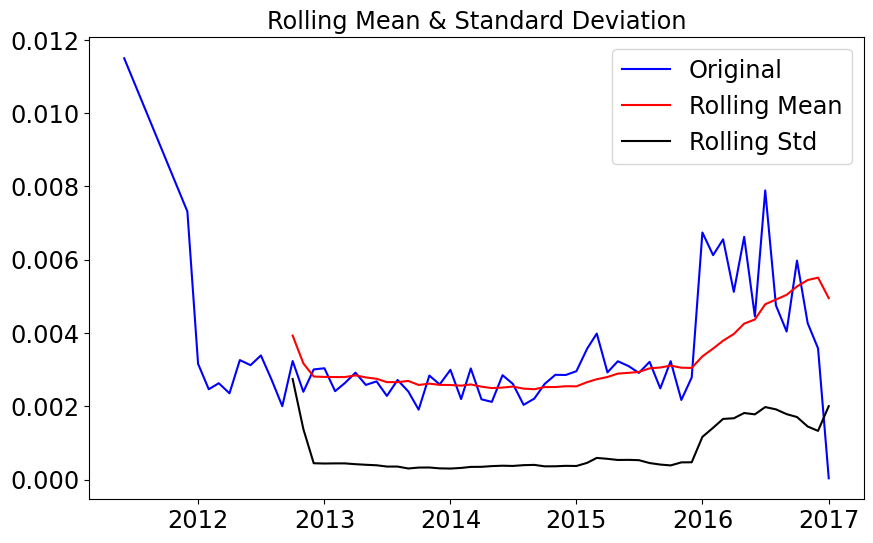

Results of Dickey-Fuller Test:
Test Statistic                -4
p-value                        0
#Lags Used                     1
Number of Observations Used   61
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64

________________________________________________________________________________________________________________________


							 Whse_C 



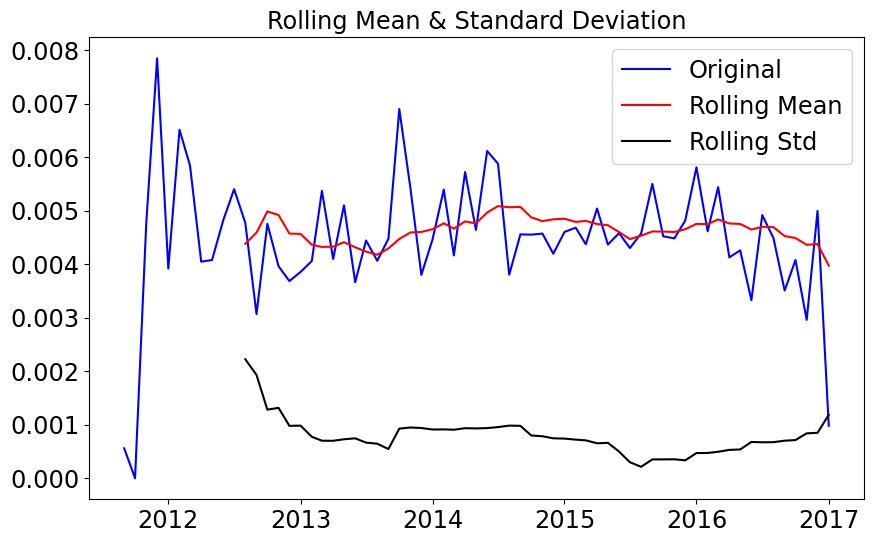

Results of Dickey-Fuller Test:
Test Statistic                -7
p-value                        0
#Lags Used                     1
Number of Observations Used   63
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64

________________________________________________________________________________________________________________________


							 Whse_J 



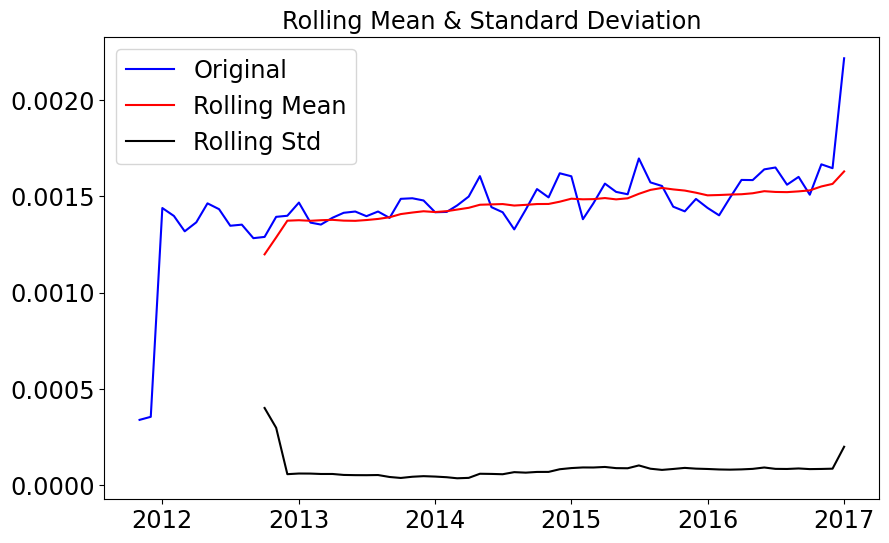

Results of Dickey-Fuller Test:
Test Statistic                -0
p-value                        1
#Lags Used                     5
Number of Observations Used   57
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [100]:
class Color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

for warehouse in Warehouse:
    print("\n" + "_" * 120)
    print(Color.BOLD + f"\n\n\t\t\t\t\t\t\t {warehouse} \n" + Color.END)
    
    # Fetch the processed data for the warehouse
    warehouse_data = diff_warehouse(warehouse)
    
    # Check if the 'Order_Demand' or relevant column exists in the processed data
    if 'Order_Demand' in warehouse_data.columns:
        timeseries = warehouse_data['Order_Demand']
    elif 'Order_Demand_Scaled' in warehouse_data.columns:  # Use scaled version if available
        timeseries = warehouse_data['Order_Demand_Scaled']
    else:
        print(f"Error: 'Order_Demand' column not found for {warehouse}. Skipping.")
        continue

    # Perform stationarity test
    test_stationarity(timeseries)



________________________________________________________________________________________________________________________


							 Whse_A 



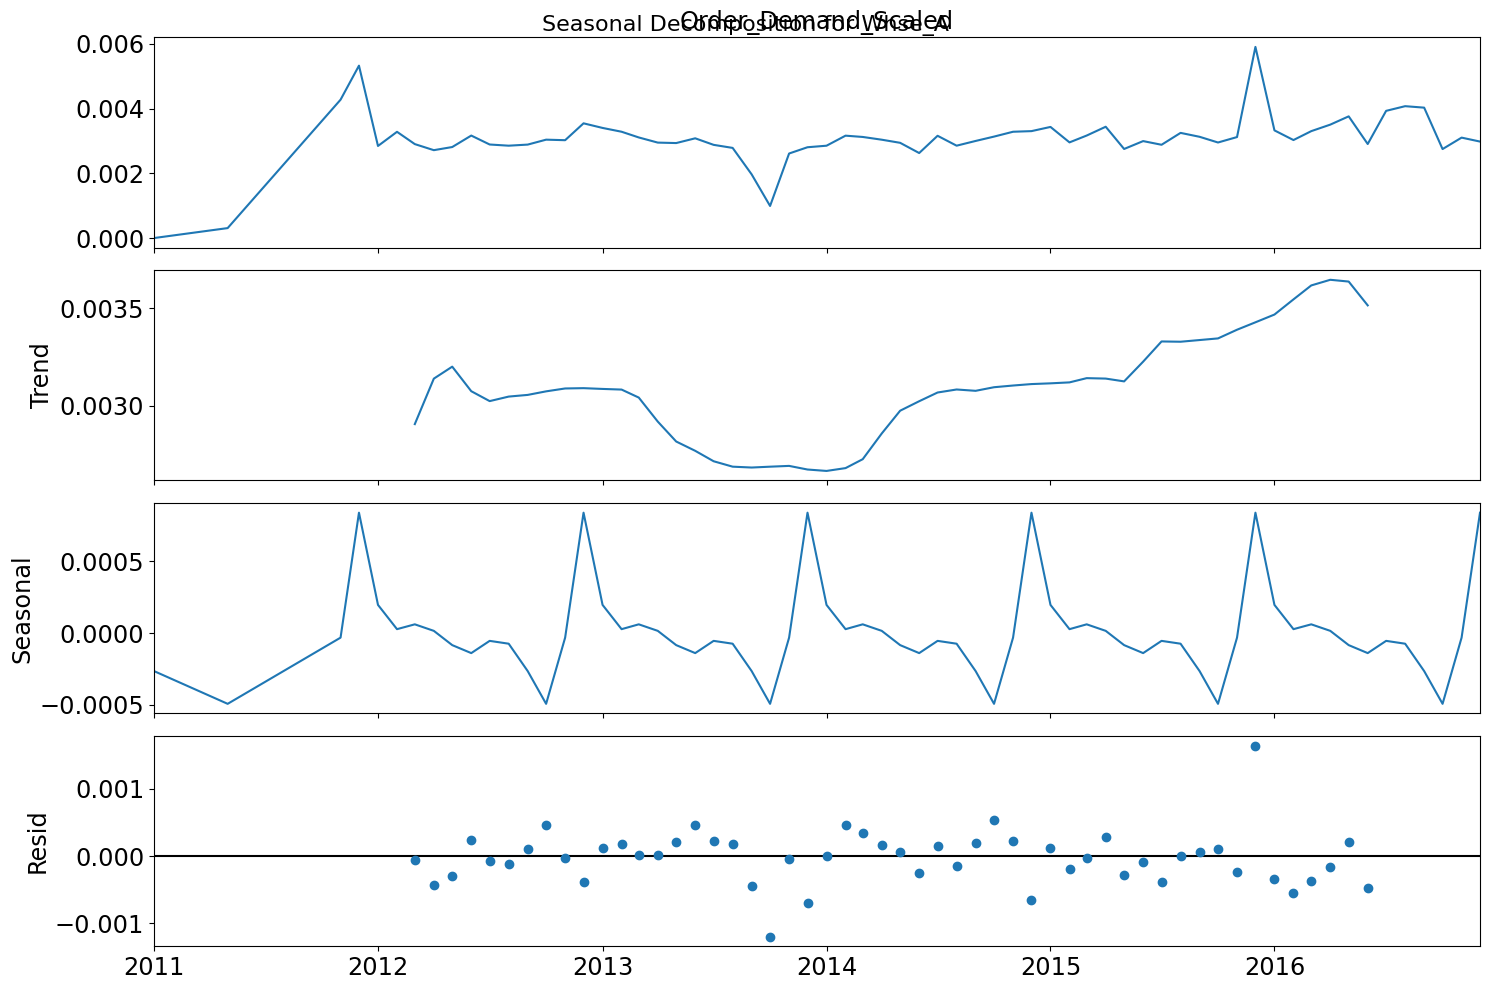


________________________________________________________________________________________________________________________


							 Whse_S 



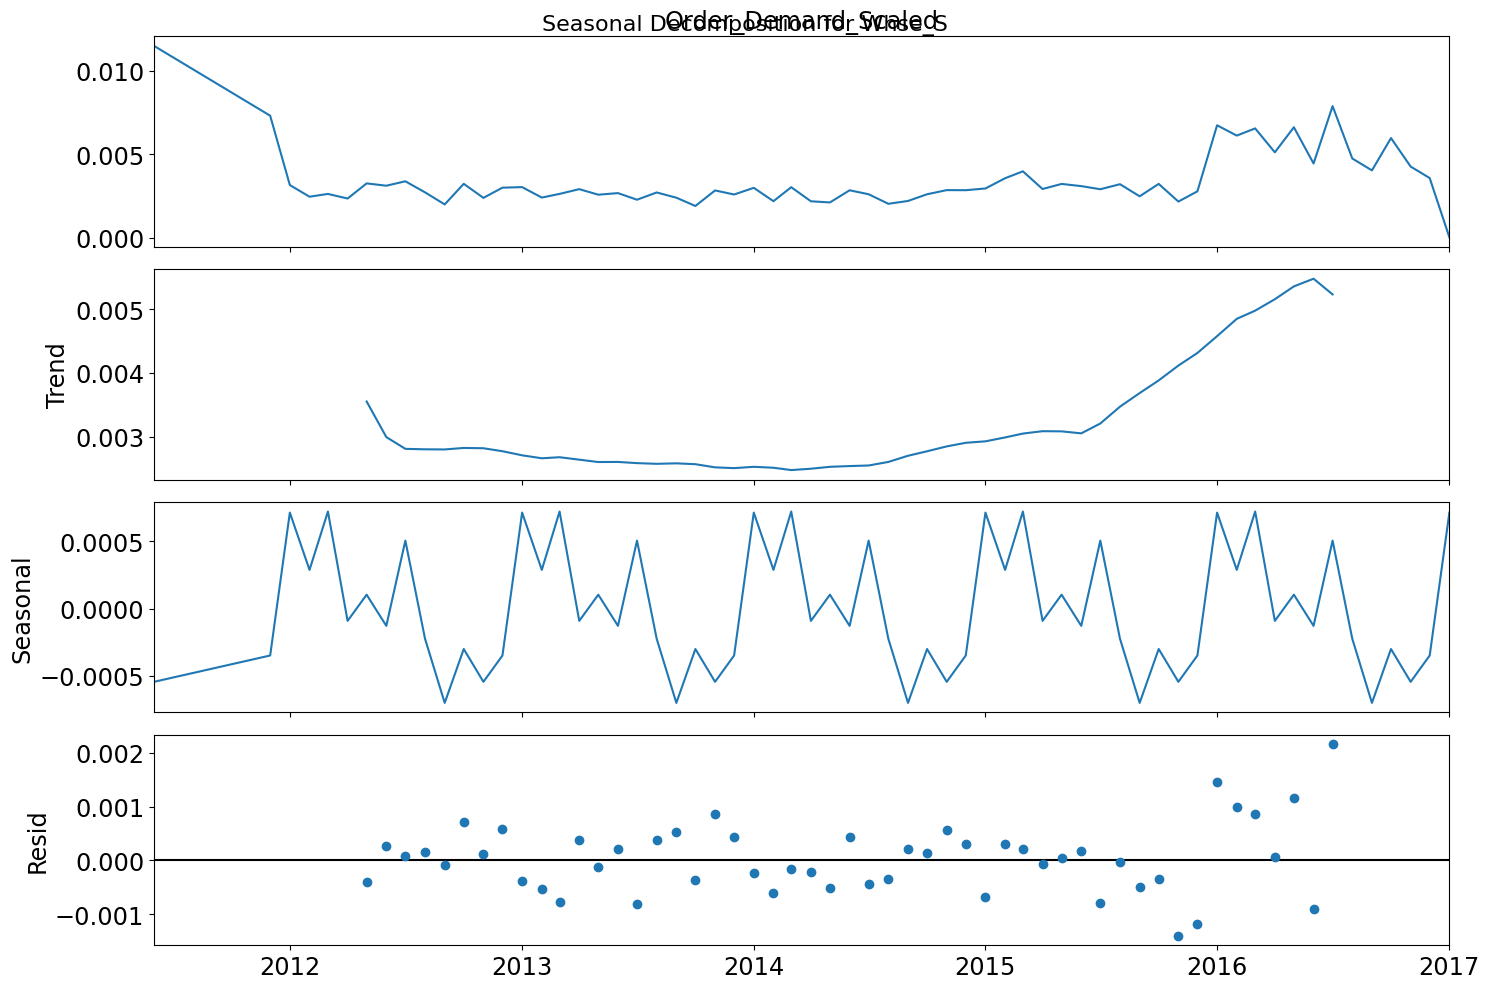


________________________________________________________________________________________________________________________


							 Whse_C 



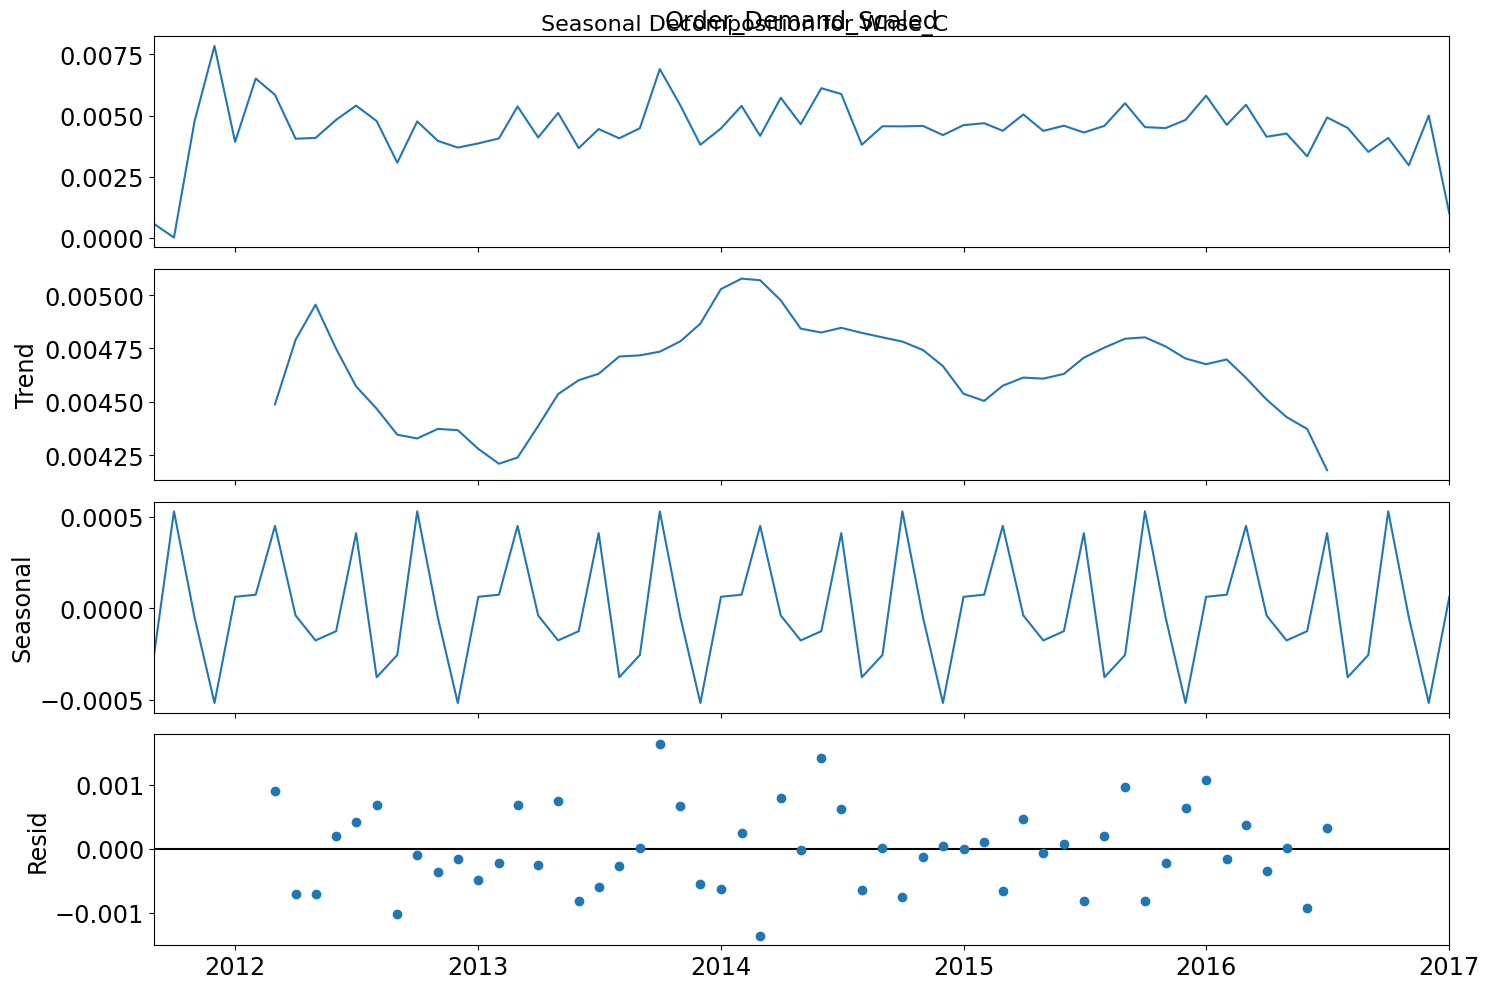


________________________________________________________________________________________________________________________


							 Whse_J 



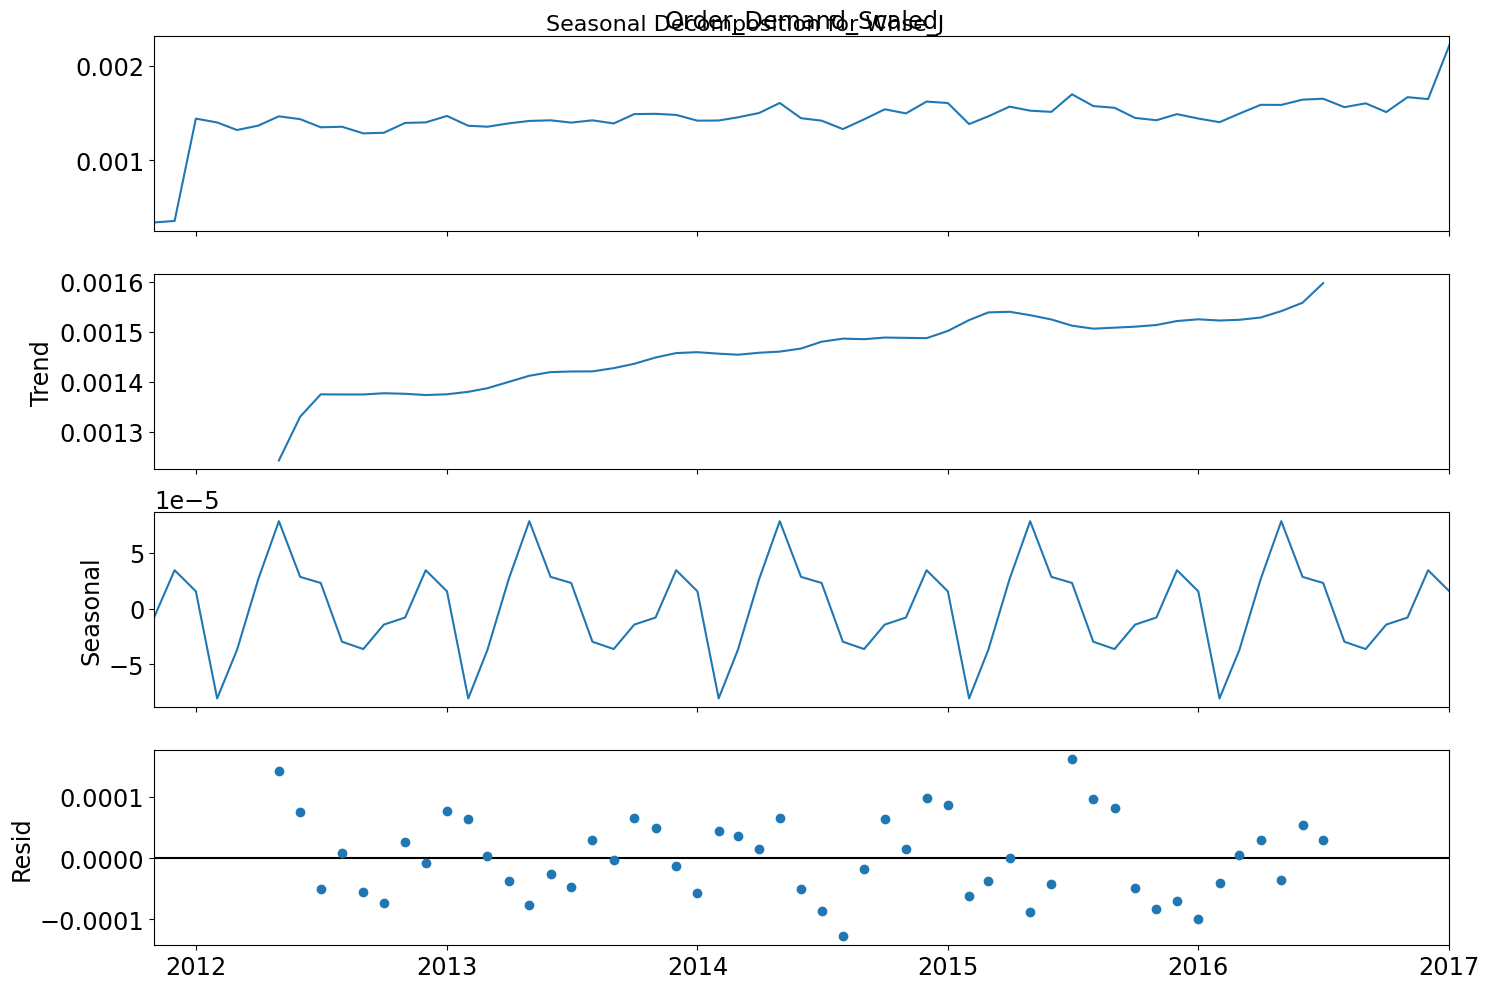

In [101]:
for warehouse in Warehouse:
    print("\n" + "_" * 120)
    print(Color.BOLD + f"\n\n\t\t\t\t\t\t\t {warehouse} \n" + Color.END)
    
    # Fetch the processed data for the warehouse
    warehouse_data = diff_warehouse(warehouse)
    
    # Check if 'Order_Demand' exists, or fall back to a scaled version
    if 'Order_Demand' in warehouse_data.columns:
        timeseries = warehouse_data['Order_Demand']
    elif 'Order_Demand_Scaled' in warehouse_data.columns:  # Use scaled version if available
        timeseries = warehouse_data['Order_Demand_Scaled']
    else:
        print(f"Error: 'Order_Demand' column not found for {warehouse}. Skipping.")
        continue

    # Perform seasonal decomposition
    try:
        decomp = sm.tsa.seasonal_decompose(timeseries, model='additive', period=12)
        decomp.plot()
        plt.suptitle(f"Seasonal Decomposition for {warehouse}", fontsize=16)
        plt.show()
    except Exception as e:
        print(f"Error performing decomposition for {warehouse}: {e}")



________________________________________________________________________________________________________________________


							 Whse_A 



<Figure size 1200x600 with 0 Axes>

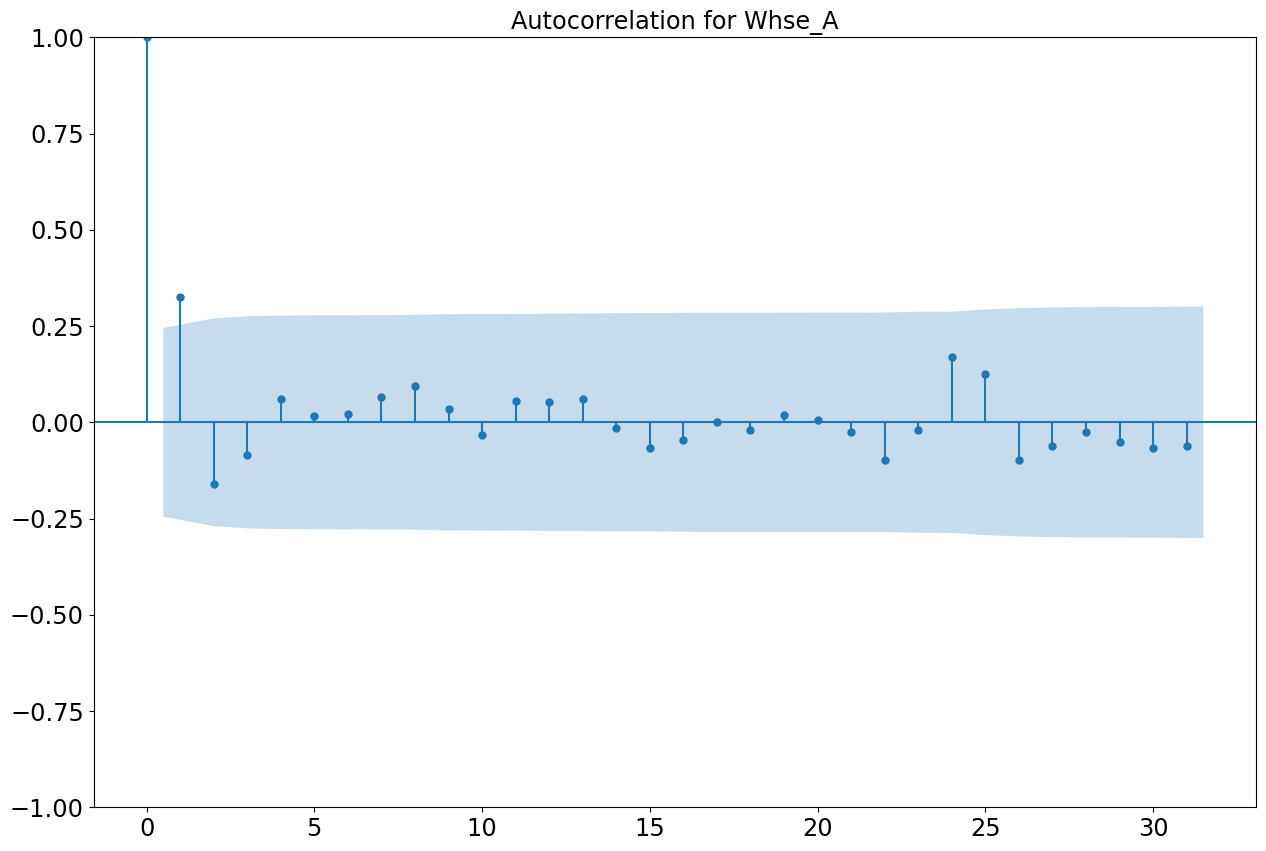

<Figure size 1200x600 with 0 Axes>

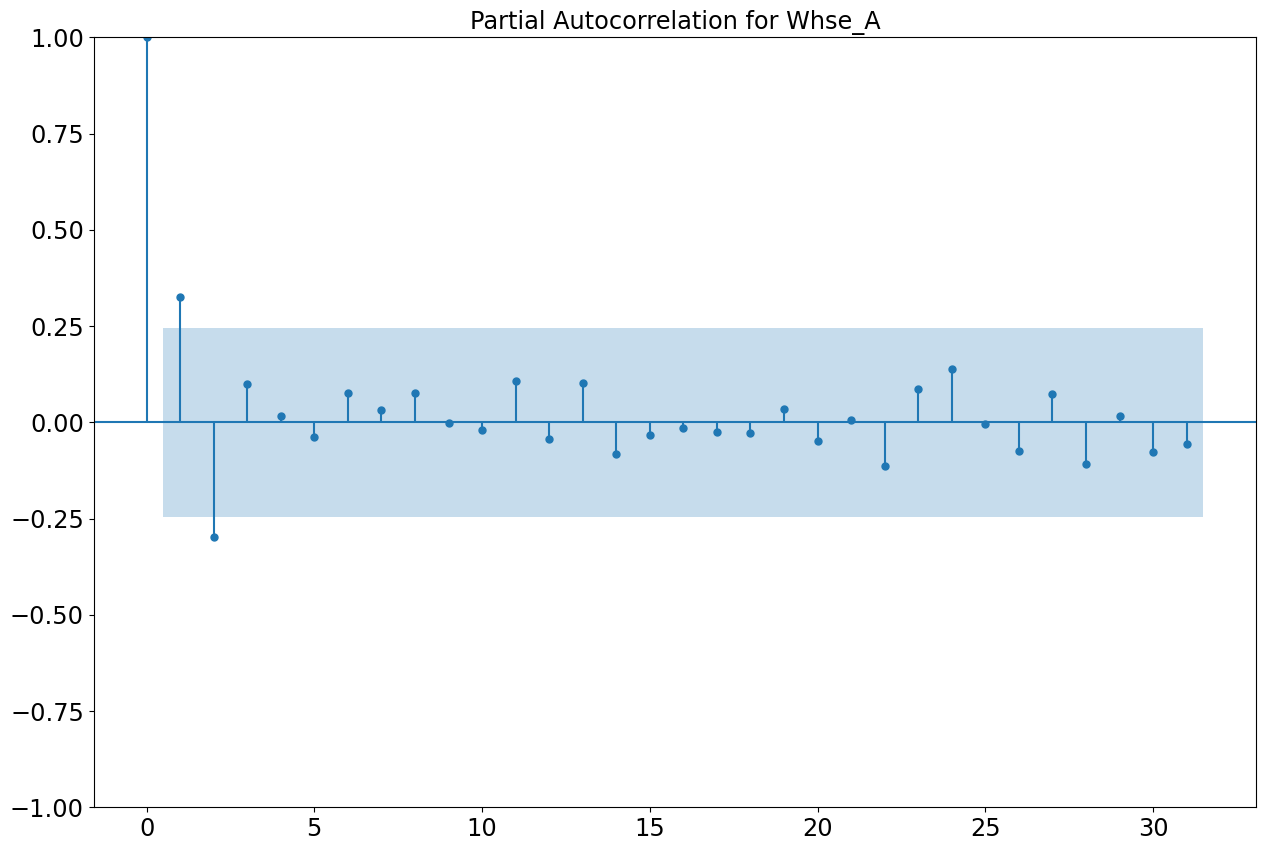


________________________________________________________________________________________________________________________


							 Whse_S 



<Figure size 1200x600 with 0 Axes>

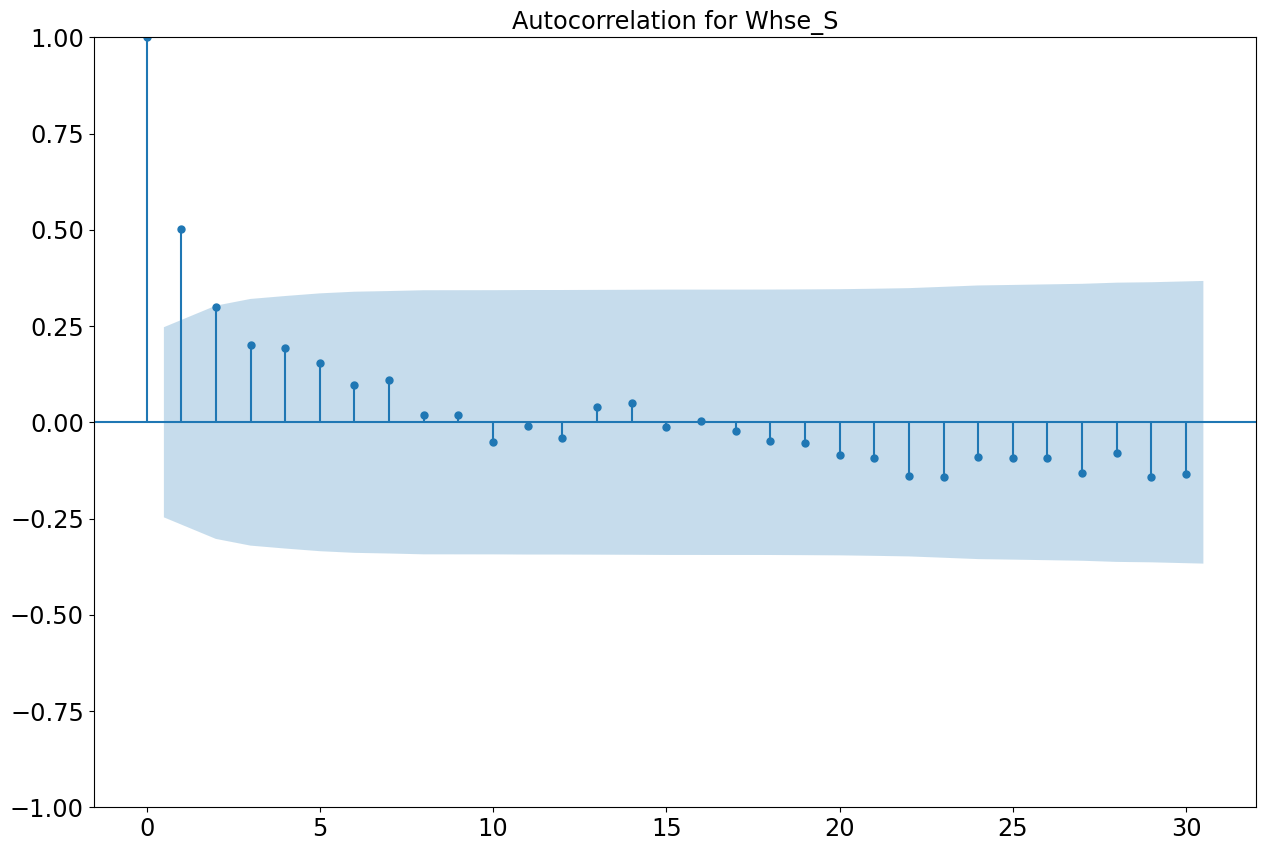

<Figure size 1200x600 with 0 Axes>

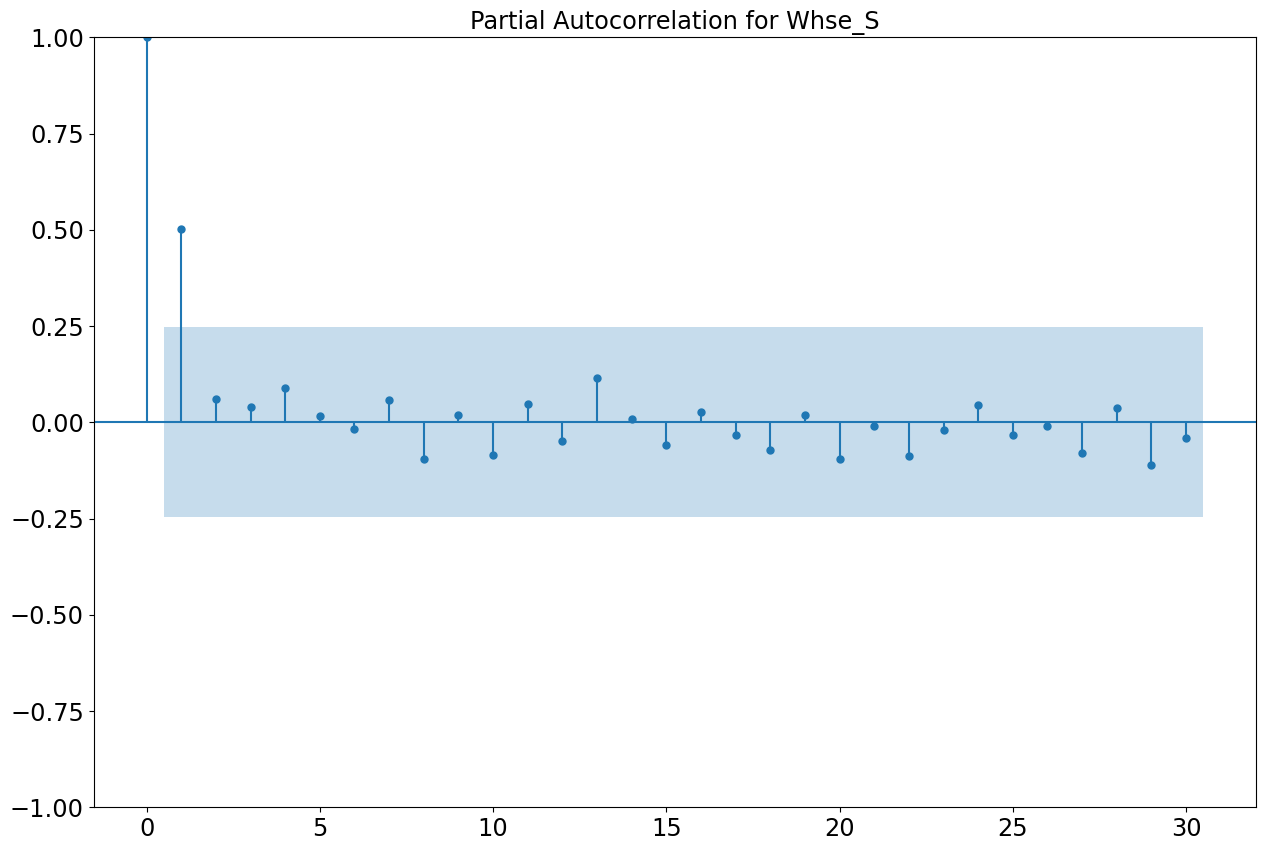


________________________________________________________________________________________________________________________


							 Whse_C 



<Figure size 1200x600 with 0 Axes>

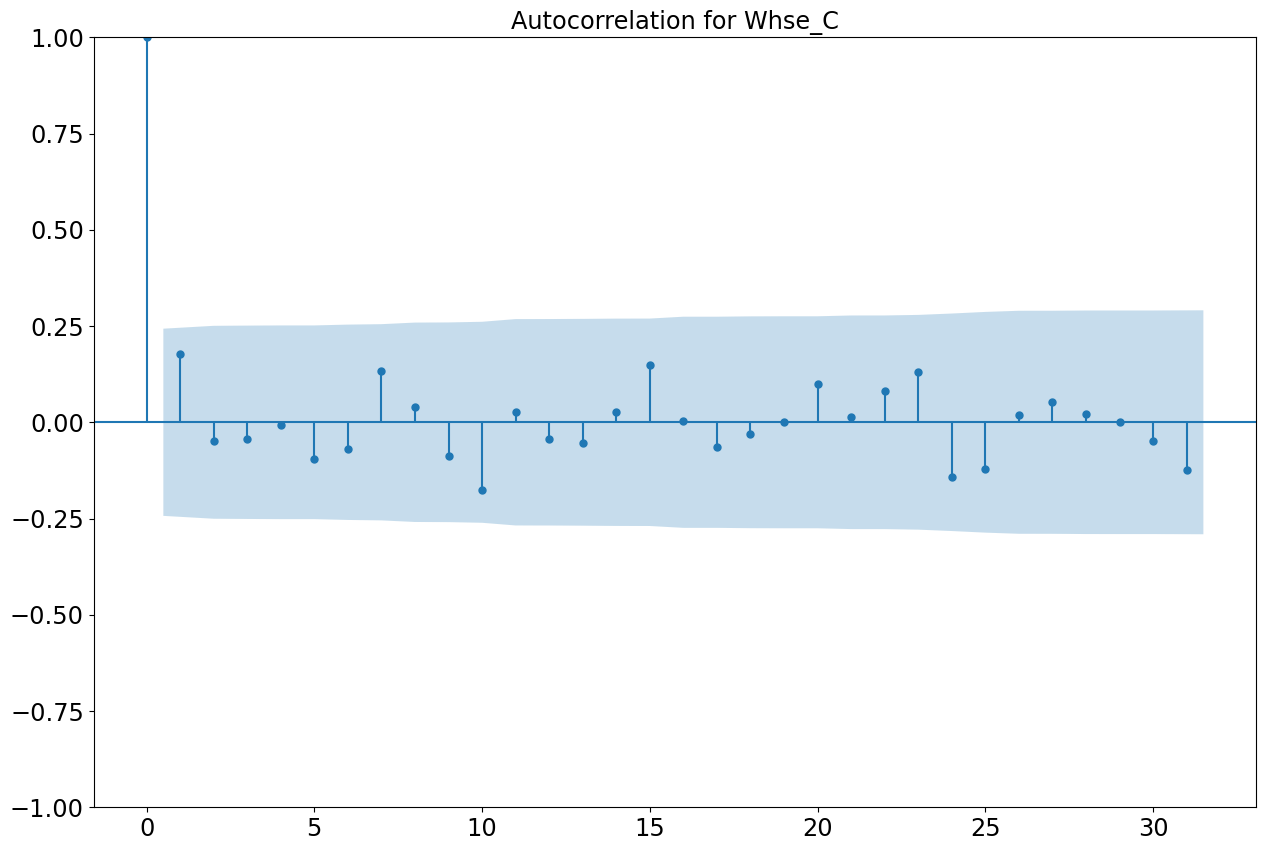

<Figure size 1200x600 with 0 Axes>

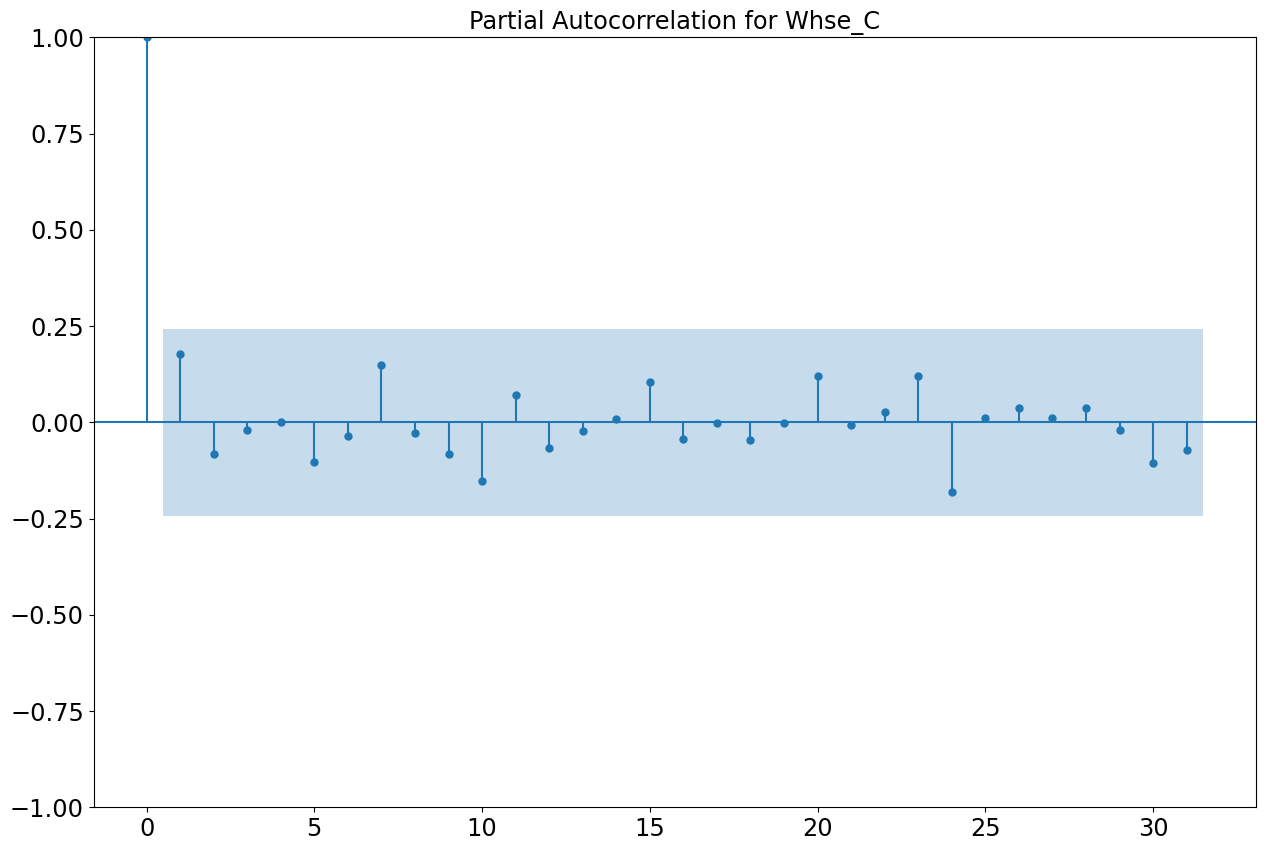


________________________________________________________________________________________________________________________


							 Whse_J 



<Figure size 1200x600 with 0 Axes>

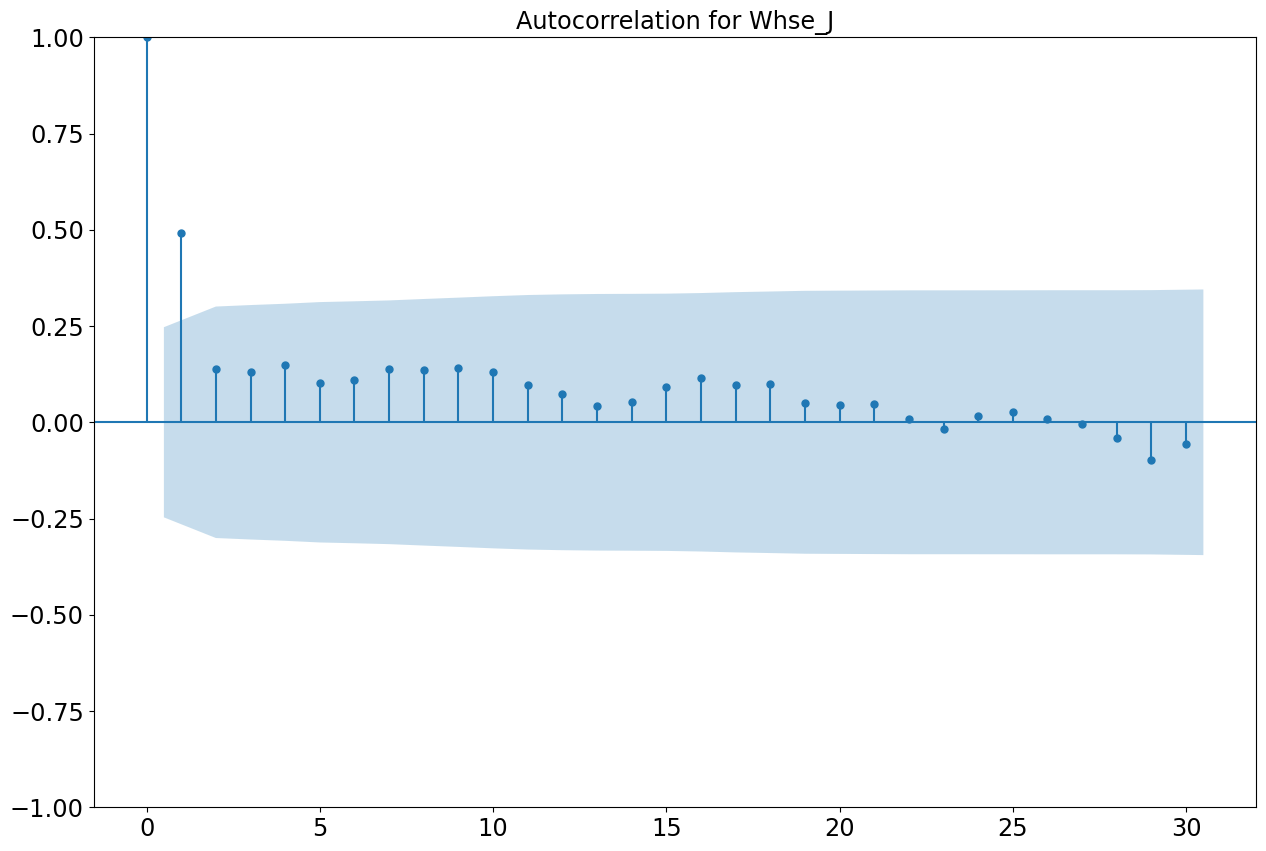

<Figure size 1200x600 with 0 Axes>

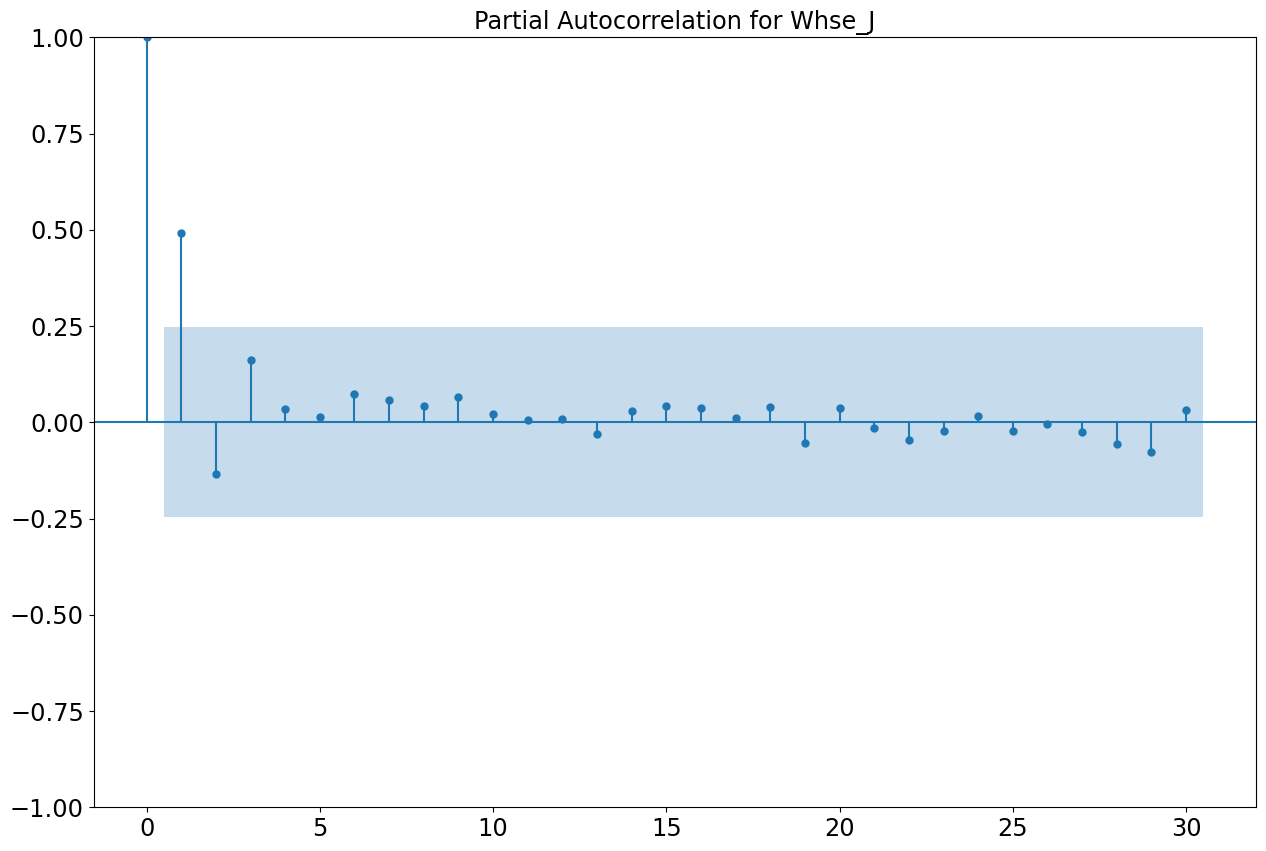

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

for warehouse in Warehouse:
    print("\n" + "_" * 120)
    print(Color.BOLD + f"\n\n\t\t\t\t\t\t\t {warehouse} \n" + Color.END)
    
    # Fetch the processed data for the warehouse
    warehouse_data = diff_warehouse(warehouse)
    
    # Check if 'Order_Demand' exists, or fall back to a scaled version
    if 'Order_Demand' in warehouse_data.columns:
        timeseries = warehouse_data['Order_Demand']
    elif 'Order_Demand_Scaled' in warehouse_data.columns:  # Use scaled version if available
        timeseries = warehouse_data['Order_Demand_Scaled']
    else:
        print(f"Error: 'Order_Demand' column not found for {warehouse}. Skipping.")
        continue

    # Ensure enough observations for PACF/ACF
    timeseries = timeseries.dropna()
    max_lags = min(40, len(timeseries) // 2 - 1)

    if max_lags < 1:
        print(f"Not enough data points for ACF/PACF plots for {warehouse}. Skipping.")
        continue

    # Plot ACF
    plt.figure(figsize=(12, 6))
    plot_acf(timeseries, lags=max_lags, title=f"Autocorrelation for {warehouse}")
    plt.show()
    
    # Plot PACF
    plt.figure(figsize=(12, 6))
    plot_pacf(timeseries, lags=max_lags, title=f"Partial Autocorrelation for {warehouse}")
    plt.show()


## Method 2 - Auto Arima


________________________________________________________________________________________________________________________


							 Whse_A 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-330.080, Time=0.43 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-336.361, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-338.204, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-332.465, Time=0.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-334.513, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-332.604, Time=0.45 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-330.514, Time=0.10 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-332.516, Time=0.15 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-328.515, Time=0.33 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-340.312, Time=0.15 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-335.097, Time=0.29 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-336.364, Time=0.37 sec
 ARIMA(0,1,0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error i

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.70436D+00    |proj g|=  1.77944D+03
  ys=-1.771E-07  -gs= 6.205E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     71      2     1     0   1.642D+01  -3.913D+00
  F =  -3.9126390124544073     

ABNORMAL_TERMINATION_IN_LNSRCH                              

Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                Order

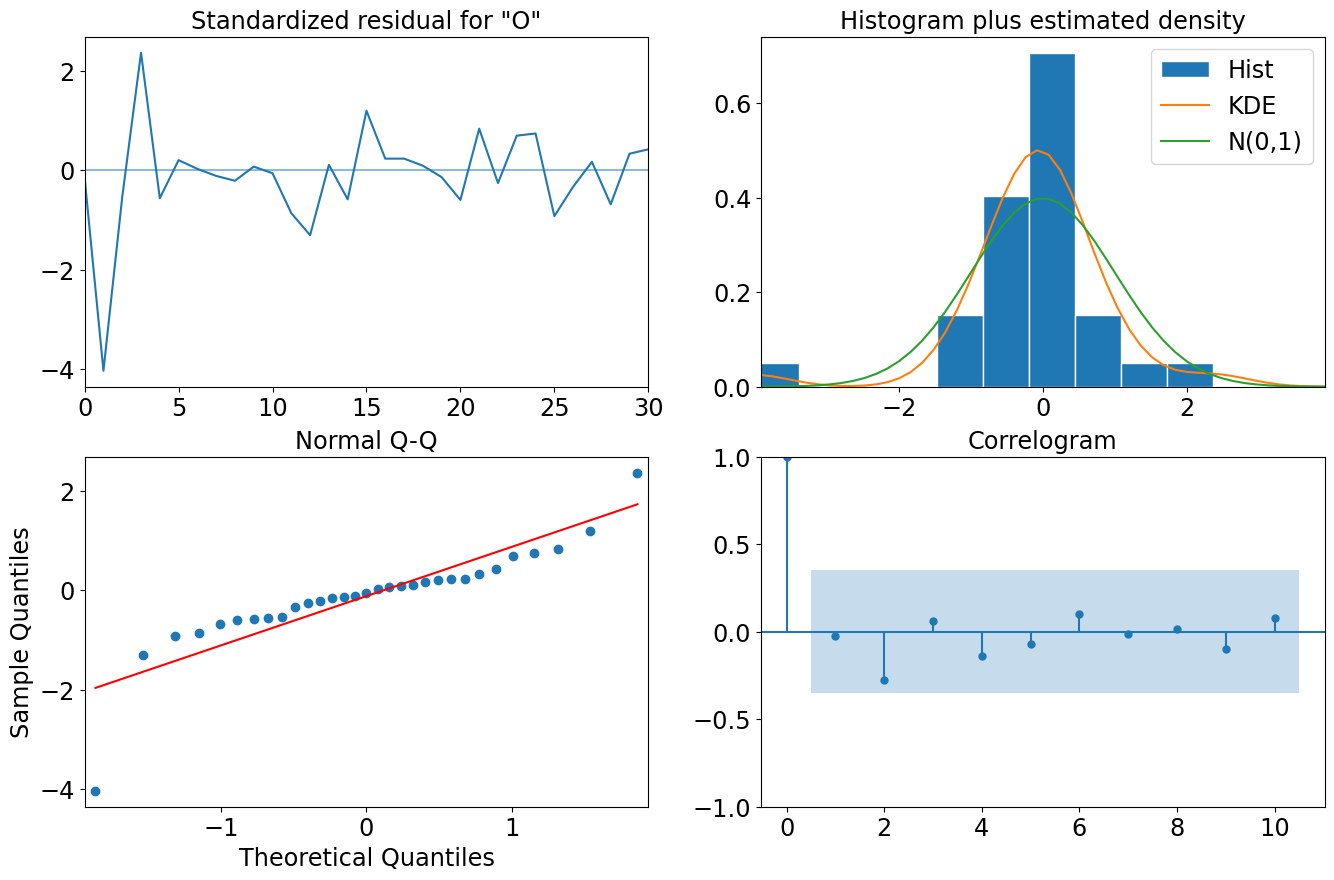


Forecasting using the trained model...

Forecast DataFrame:
            Forecast  Lower_CI  Upper_CI
Month                                   
2015-05-01       NaN       NaN       NaN
2015-06-01       NaN       NaN       NaN
2015-07-01       NaN       NaN       NaN
2015-08-01       NaN       NaN       NaN
2015-09-01       NaN       NaN       NaN
2015-10-01       NaN       NaN       NaN
2015-11-01       NaN       NaN       NaN
2015-12-01       NaN       NaN       NaN
2016-01-01       NaN       NaN       NaN
2016-02-01       NaN       NaN       NaN
2016-03-01       NaN       NaN       NaN
2016-04-01       NaN       NaN       NaN
2016-05-01       NaN       NaN       NaN
2016-06-01       NaN       NaN       NaN
2016-07-01       NaN       NaN       NaN
2016-08-01       NaN       NaN       NaN
2016-09-01       NaN       NaN       NaN
2016-10-01       NaN       NaN       NaN
2016-11-01       NaN       NaN       NaN
2016-12-01       NaN       NaN       NaN


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



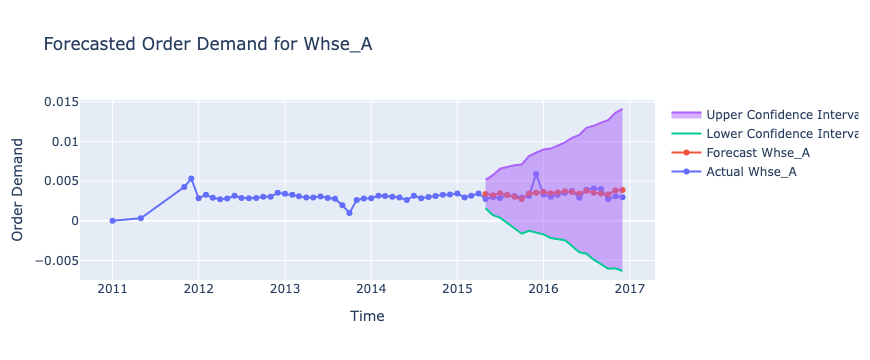


________________________________________________________________________________________________________________________


							 Whse_S 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-299.796, Time=0.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-318.258, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-316.736, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-301.848, Time=0.32 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-317.264, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-316.259, Time=0.13 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-314.259, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-317.533, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-303.848, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-301.795, Time=0.05 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=-317.775, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.404 seconds
O

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


                                     SARIMAX Results                                      
Dep. Variable:                Order_Demand_Scaled   No. Observations:                   44
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 160.129
Date:                            Wed, 20 Nov 2024   AIC                           -318.258
Time:                                    15:32:53   BIC                           -316.824
Sample:                                         0   HQIC                          -317.790
                                             - 44                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.896e-06   2.62e-07      7.247      0.000    1.38e-06    2.41e-06
Ljung-Box (L1) (Q):                

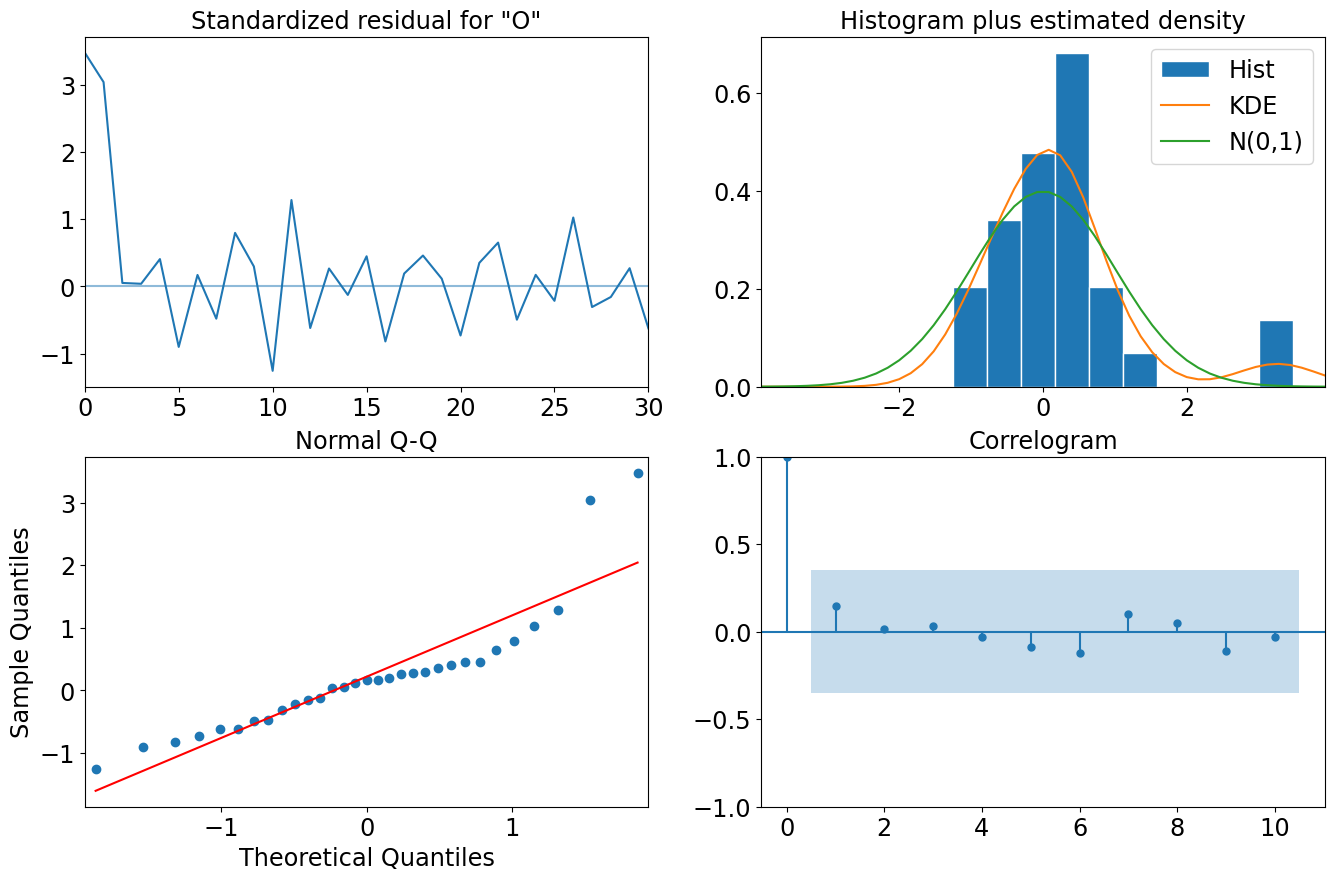


Forecasting using the trained model...

Forecast DataFrame:
            Forecast  Lower_CI  Upper_CI
Month                                   
2015-07-01       NaN       NaN       NaN
2015-08-01       NaN       NaN       NaN
2015-09-01       NaN       NaN       NaN
2015-10-01       NaN       NaN       NaN
2015-11-01       NaN       NaN       NaN
2015-12-01       NaN       NaN       NaN
2016-01-01       NaN       NaN       NaN
2016-02-01       NaN       NaN       NaN
2016-03-01       NaN       NaN       NaN
2016-04-01       NaN       NaN       NaN
2016-05-01       NaN       NaN       NaN
2016-06-01       NaN       NaN       NaN
2016-07-01       NaN       NaN       NaN
2016-08-01       NaN       NaN       NaN
2016-09-01       NaN       NaN       NaN
2016-10-01       NaN       NaN       NaN
2016-11-01       NaN       NaN       NaN
2016-12-01       NaN       NaN       NaN
2017-01-01       NaN       NaN       NaN


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



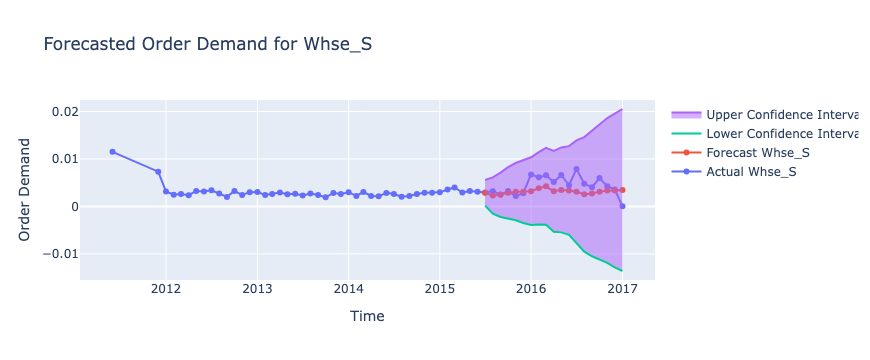


________________________________________________________________________________________________________________________


							 Whse_C 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-305.020, Time=0.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-304.052, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-304.902, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-307.826, Time=0.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-309.826, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-307.963, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-305.825, Time=0.12 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-307.021, Time=0.05 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=-307.771, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-306.768, Time=0.05 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=-305.667, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=-308.062, Time=0.04 sec

Best model:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


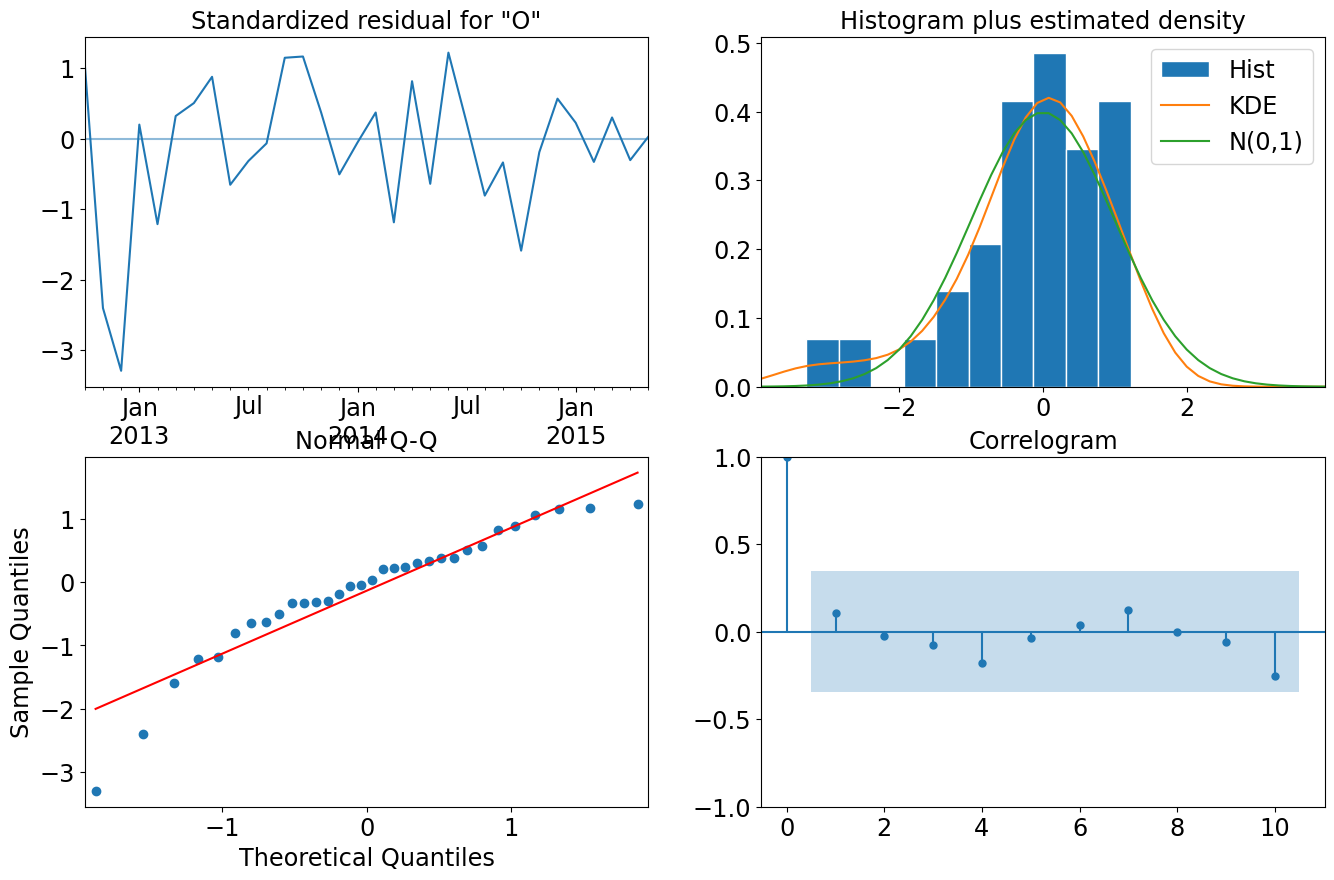


Forecasting using the trained model...

Forecast DataFrame:
            Forecast  Lower_CI  Upper_CI
Month                                   
2015-06-01         0         0         0
2015-07-01         0         0         0
2015-08-01         0        -0         0
2015-09-01         0         0         0
2015-10-01         0         0         0
2015-11-01         0        -0         0
2015-12-01         0        -0         0
2016-01-01         0        -0         0
2016-02-01         0        -0         0
2016-03-01         0        -0         0
2016-04-01         0        -0         0
2016-05-01         0        -0         0
2016-06-01         0        -0         0
2016-07-01         0        -0         0
2016-08-01         0        -0         0
2016-09-01         0        -0         0
2016-10-01         0        -0         0
2016-11-01         0        -0         0
2016-12-01         0        -0         0
2017-01-01         0        -0         0


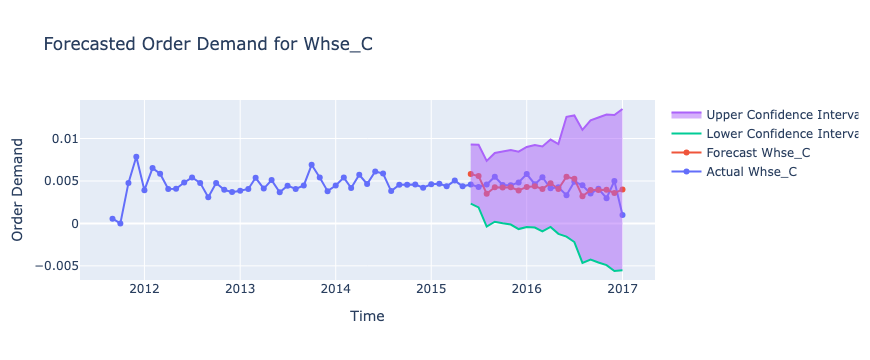


________________________________________________________________________________________________________________________


							 Whse_J 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-427.000, Time=0.31 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-436.870, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-433.004, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-429.353, Time=0.14 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-434.942, Time=0.15 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-434.838, Time=0.19 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-432.836, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-434.856, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-431.332, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-429.023, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=-435.705, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.177 seconds
O

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.96285D+00    |proj g|=  1.43027D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3     28      1     0     0   1.097D+02  -4.987D+00
  F =  -4.9871541074515511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                Order_Demand_Scaled   No. Observations:                  

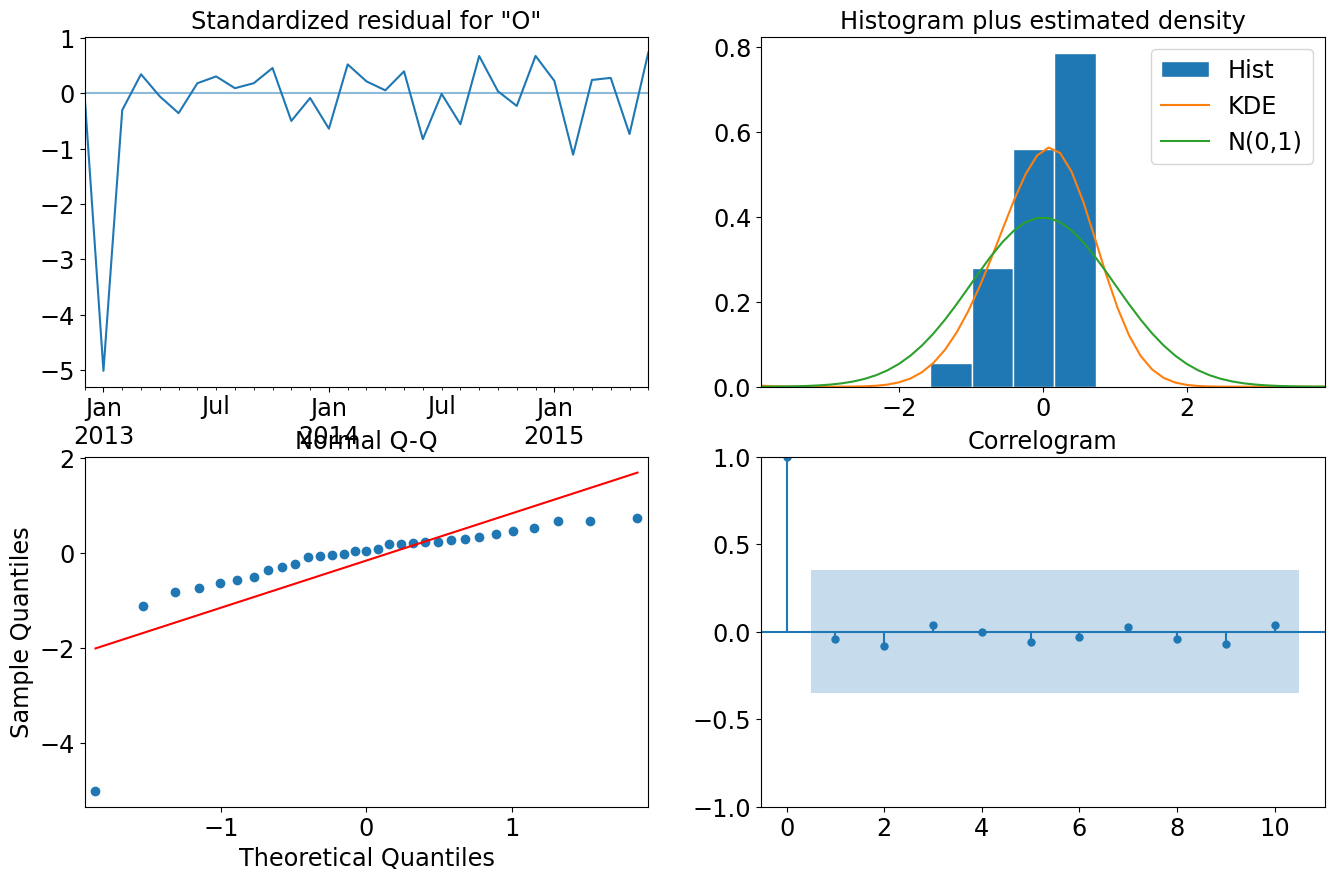


Forecasting using the trained model...

Forecast DataFrame:
            Forecast  Lower_CI  Upper_CI
Month                                   
2015-07-01         0         0         0
2015-08-01         0         0         0
2015-09-01         0         0         0
2015-10-01         0         0         0
2015-11-01         0         0         0
2015-12-01         0         0         0
2016-01-01         0         0         0
2016-02-01         0         0         0
2016-03-01         0         0         0
2016-04-01         0         0         0
2016-05-01         0         0         0
2016-06-01         0         0         0
2016-07-01         0        -0         0
2016-08-01         0        -0         0
2016-09-01         0        -0         0
2016-10-01         0        -0         0
2016-11-01         0        -0         0
2016-12-01         0        -0         0
2017-01-01         0        -0         0


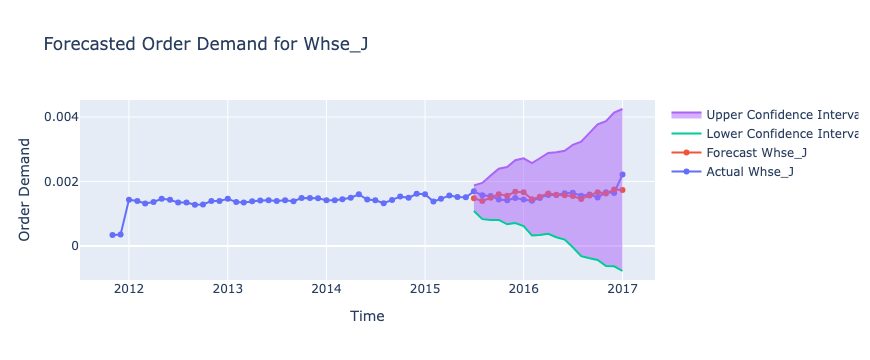

In [109]:
from pmdarima import auto_arima
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statsmodels.api as sm

for warehouse in Warehouse:
    print("\n" + "_" * 120)
    print(Color.BOLD + f"\n\n\t\t\t\t\t\t\t {warehouse} \n" + Color.END)
    
    # Fetch and split the data
    warehouse_data = diff_warehouse(warehouse)
    
    if 'Order_Demand' in warehouse_data.columns:
        timeseries = warehouse_data['Order_Demand']
    elif 'Order_Demand_Scaled' in warehouse_data.columns:
        timeseries = warehouse_data['Order_Demand_Scaled']
    else:
        print(f"Error: 'Order_Demand' column not found for {warehouse}. Skipping.")
        continue
    
    train = timeseries.iloc[:int(len(timeseries) * 0.7)]
    test = timeseries.iloc[int(len(timeseries) * 0.7):]

    # Run Auto ARIMA
    try:
        stepwise_model = auto_arima(train, start_p=1, start_q=1, 
                                    max_p=3, max_q=3, m=12,  # Seasonal frequency is set to 12 months
                                    start_P=0, seasonal=True,
                                    d=1, D=1, trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True, 
                                    stepwise=True)
        print(f"Optimal Model for {warehouse}: {stepwise_model}")
        print(f"AIC: {stepwise_model.aic()}, BIC: {stepwise_model.bic()}")
        
        # Fit the SARIMAX model
        order = stepwise_model.order
        seasonal_order = stepwise_model.seasonal_order
        mod = sm.tsa.statespace.SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_invertibility=False)
        results = mod.fit()
        print("\nModel Summary:")
        print(results.summary())
        
        # Plot diagnostics
        print("\nPlotting Diagnostics:")
        results.plot_diagnostics(figsize=(16, 10))
        plt.show()
        
        # Forecasting
        print("\nForecasting using the trained model...")
        forecast = results.get_forecast(steps=len(test))
        forecast_index = test.index
        forecast_mean = forecast.predicted_mean
        forecast_ci = forecast.conf_int()

        # Create dataframe for predictions
        forecast_df = pd.DataFrame({
            "Forecast": forecast_mean,
            "Lower_CI": forecast_ci.iloc[:, 0],
            "Upper_CI": forecast_ci.iloc[:, 1]
        }, index=forecast_index)
        print("\nForecast DataFrame:")
        print(forecast_df)

        # Visualization with Plotly
        actual_trace = go.Scatter(
            x=timeseries.index, 
            y=timeseries, 
            mode='lines+markers', 
            name=f"Actual {warehouse}"
        )
        forecast_trace = go.Scatter(
            x=forecast_index, 
            y=forecast_mean, 
            mode='lines+markers', 
            name=f"Forecast {warehouse}"
        )
        lower_ci = go.Scatter(
            x=forecast_index, 
            y=forecast_ci.iloc[:, 0], 
            fill=None,
            mode='lines', 
            name="Lower Confidence Interval"
        )
        upper_ci = go.Scatter(
            x=forecast_index, 
            y=forecast_ci.iloc[:, 1], 
            fill='tonexty',
            mode='lines', 
            name="Upper Confidence Interval"
        )

        layout = go.Layout(
            title=f"Forecasted Order Demand for {warehouse}",
            xaxis=dict(title='Time'),
            yaxis=dict(title='Order Demand'),
            showlegend=True
        )
        fig = go.Figure(data=[actual_trace, forecast_trace, lower_ci, upper_ci], layout=layout)
        fig.show()

    except Exception as e:
        print(f"Error processing warehouse {warehouse}: {e}")


## Differencing

In [110]:
# Perform first-order differencing
warehouse_name = Warehouse[1]  # Replace with your desired warehouse index
warehouse_data = diff_warehouse(warehouse_name)

if 'Order_Demand' in warehouse_data.columns:
    timeseries = warehouse_data['Order_Demand']
elif 'Order_Demand_Scaled' in warehouse_data.columns:  # Use scaled version if available
    timeseries = warehouse_data['Order_Demand_Scaled']
else:
    raise ValueError(f"Order demand column not found for {warehouse_name}.")

# Apply differencing
warehouse_data['DIFFERENCING'] = timeseries.diff(periods=1)  # First-order differencing

# Display results
print("First 5 Rows of Differenced Data:")
print(warehouse_data['DIFFERENCING'].head())

print("\nLength of Differenced Data:")
print(len(warehouse_data['DIFFERENCING']))

print("\nDifferenced DataFrame:")
print(warehouse_data)

First 5 Rows of Differenced Data:
Month
2011-06-01   NaN
2011-12-01    -0
2012-01-01    -0
2012-02-01    -0
2012-03-01     0
Name: DIFFERENCING, dtype: float64

Length of Differenced Data:
63

Differenced DataFrame:
            Order_Demand_Scaled  MA_3  MA_3_std Warehouse  DIFFERENCING
Month                                                                  
2011-06-01                    0   NaN       NaN    Whse_S           NaN
2011-12-01                    0   NaN       NaN    Whse_S            -0
2012-01-01                    0     0         0    Whse_S            -0
2012-02-01                    0     0         0    Whse_S            -0
2012-03-01                    0     0         0    Whse_S             0
...                         ...   ...       ...       ...           ...
2016-09-01                    0     0         0    Whse_S            -0
2016-10-01                    0     0         0    Whse_S             0
2016-11-01                    0     0         0    Whse_S       

### Dividing the data into testing data and training data


In [112]:
# Define the training dataset
train1 = warehouse_data.iloc[:40]  # Select the first 40 rows

# Display the first few rows of the training dataset
print("First 5 rows of train1:")
print(train1.head())

# Display the length of the training dataset
print("\nLength of train1:")
print(len(train1))

# Display the entire training dataset
print("\nFull train1 dataset:")
print(train1)

First 5 rows of train1:
            Order_Demand_Scaled  MA_3  MA_3_std Warehouse  DIFFERENCING
Month                                                                  
2011-06-01                    0   NaN       NaN    Whse_S           NaN
2011-12-01                    0   NaN       NaN    Whse_S            -0
2012-01-01                    0     0         0    Whse_S            -0
2012-02-01                    0     0         0    Whse_S            -0
2012-03-01                    0     0         0    Whse_S             0

Length of train1:
40

Full train1 dataset:
            Order_Demand_Scaled  MA_3  MA_3_std Warehouse  DIFFERENCING
Month                                                                  
2011-06-01                    0   NaN       NaN    Whse_S           NaN
2011-12-01                    0   NaN       NaN    Whse_S            -0
2012-01-01                    0     0         0    Whse_S            -0
2012-02-01                    0     0         0    Whse_S           

Testing Stationarity on Differenced Data:


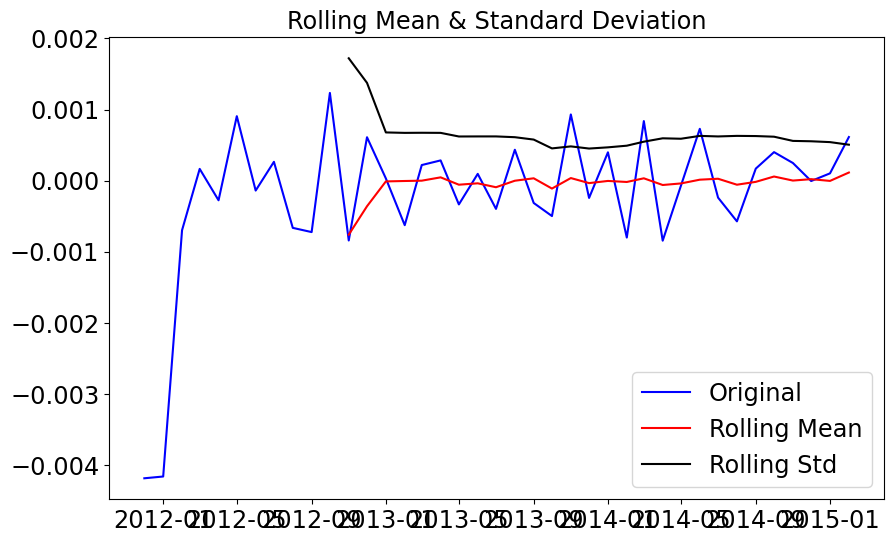

Results of Dickey-Fuller Test:
Test Statistic                -9
p-value                        0
#Lags Used                     1
Number of Observations Used   37
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [113]:
# Ensure the DIFFERENCING column is present and has non-NaN values
if 'DIFFERENCING' in train1.columns:
    differencing_data = train1['DIFFERENCING'].dropna()  # Drop NaN values
    
    # Test stationarity
    print("Testing Stationarity on Differenced Data:")
    test_stationarity(differencing_data)
else:
    print("Error: 'DIFFERENCING' column not found in train1.")

In [114]:
# Reset the index to make it a regular column
train1.reset_index(inplace=True)

# Convert 'Month' to datetime if not already in datetime format
if not pd.api.types.is_datetime64_any_dtype(train1['Month']):
    train1['Month'] = pd.to_datetime(train1['Month'])

# Set 'Month' as the new index
train1 = train1.set_index('Month')

# Drop NaN values in 'DIFFERENCING' column
if 'DIFFERENCING' in train1.columns:
    train1['DIFFERENCING'].dropna(inplace=True)
else:
    print("Error: 'DIFFERENCING' column not found in train1.")

Rows with missing values in DIFFERENCING column:
            Order_Demand_Scaled  MA_3  MA_3_std Warehouse  DIFFERENCING
Month                                                                  
2011-06-01                    0   NaN       NaN    Whse_S           NaN
No missing values remain. Proceeding with decomposition.


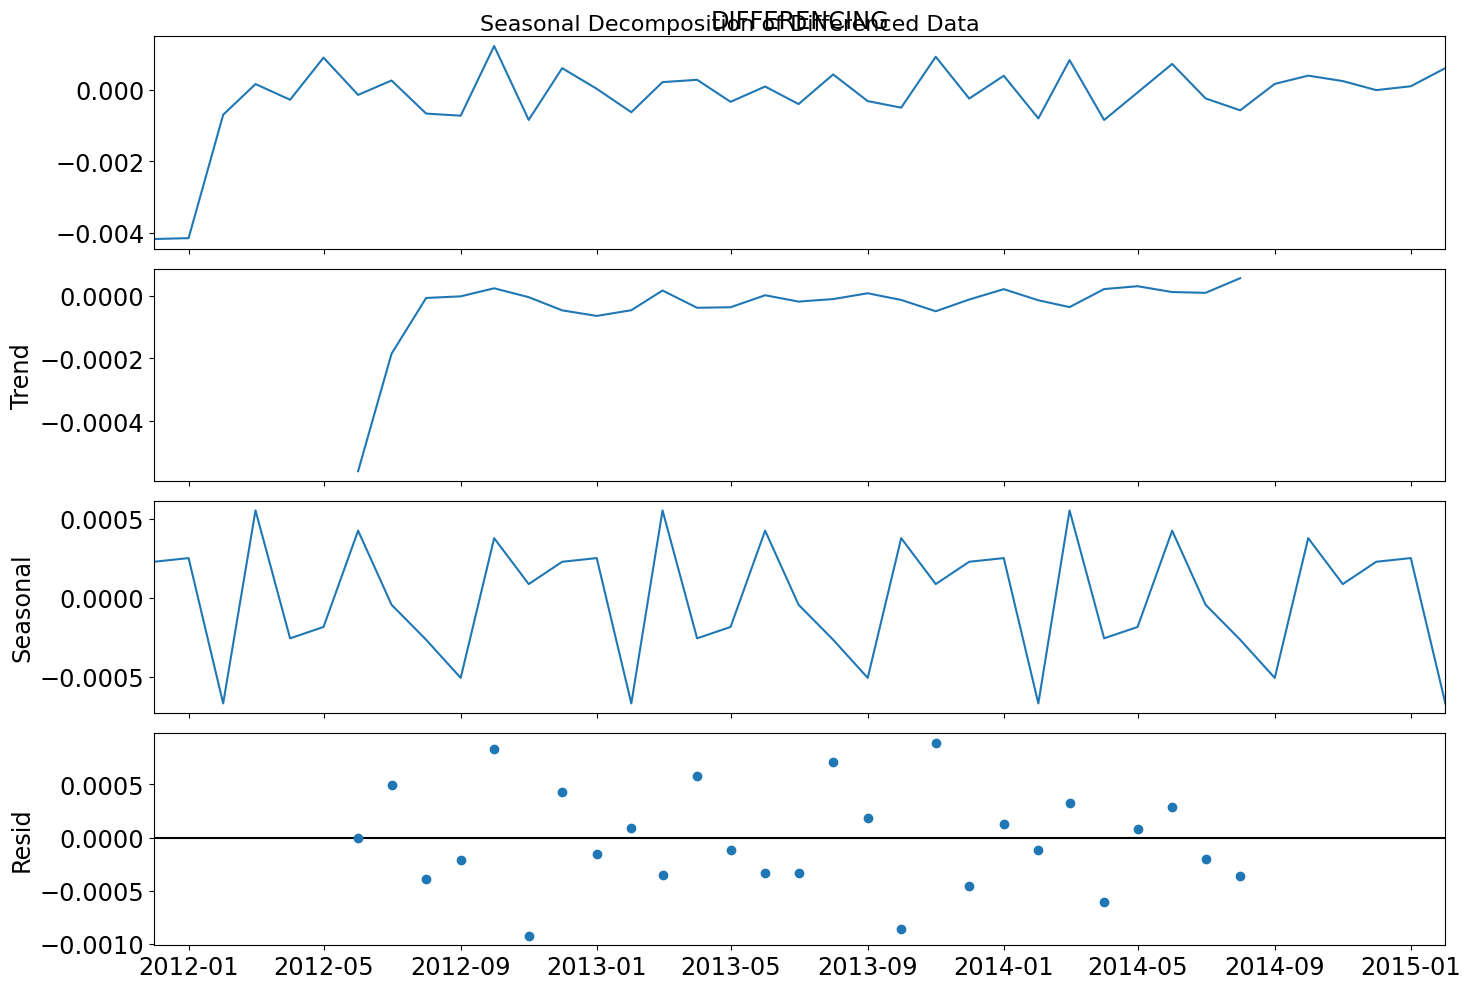

In [119]:
# Check for and locate missing values
print("Rows with missing values in DIFFERENCING column:")
print(train1[train1['DIFFERENCING'].isnull()])

# Drop rows with NaN in DIFFERENCING
train1 = train1.dropna(subset=['DIFFERENCING'])

# Verify no missing values remain
if train1['DIFFERENCING'].isnull().sum() == 0:
    print("No missing values remain. Proceeding with decomposition.")
else:
    print("Error: Missing values remain in DIFFERENCING column.")
    print(train1['DIFFERENCING'].isnull())
    raise ValueError("Cannot proceed with decomposition due to missing values.")

# Perform seasonal decomposition
try:
    decomp = sm.tsa.seasonal_decompose(train1['DIFFERENCING'], model='additive', period=12)
    decomp.plot()
    plt.suptitle("Seasonal Decomposition of Differenced Data", fontsize=16)
    plt.show()
except Exception as e:
    print(f"Error during decomposition: {e}")

In [122]:
from pmdarima import auto_arima

# Use the correct column for time series analysis
if 'Order_Demand_Scaled' in train1.columns:
    timeseries = train1['Order_Demand_Scaled']
else:
    raise KeyError("No valid Order Demand column found in train1.")

# Ensure no missing values in the selected column
timeseries = timeseries.dropna()

# Run auto_arima
stepwise_model = auto_arima(
    timeseries, 
    start_p=1, start_q=1, 
    max_p=3, max_q=3, 
    m=25,                          # Frequency of seasonality
    start_P=0, seasonal=True,      # Enable seasonal ARIMA
    d=1, D=1,                      # Differencing orders
    trace=True,                    # Display model search progress
    error_action='ignore',         # Ignore errors during fitting
    suppress_warnings=True,        # Suppress warnings
    stepwise=True                  # Use stepwise model selection
)

# Print BIC
print(f"Bayesian Information Criterion (BIC): {stepwise_model.bic()}")


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[25]             : AIC=-127.662, Time=1.77 sec
 ARIMA(0,1,0)(0,1,0)[25]             : AIC=-135.339, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[25]             : AIC=-131.396, Time=0.57 sec
 ARIMA(0,1,1)(0,1,1)[25]             : AIC=-130.159, Time=0.88 sec
 ARIMA(0,1,0)(1,1,0)[25]             : AIC=-133.339, Time=0.59 sec
 ARIMA(0,1,0)(0,1,1)[25]             : AIC=-133.339, Time=0.52 sec
 ARIMA(0,1,0)(1,1,1)[25]             : AIC=-131.340, Time=0.63 sec
 ARIMA(1,1,0)(0,1,0)[25]             : AIC=-133.396, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[25]             : AIC=-132.160, Time=0.18 sec
 ARIMA(1,1,1)(0,1,0)[25]             : AIC=-129.662, Time=0.19 sec
 ARIMA(0,1,0)(0,1,0)[25] intercept   : AIC=-134.598, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,1,0)[25]          
Total fit time: 5.641 seconds
Bayesian Information Criterion (BIC): -134.77385610917094


In [121]:
print(train1.columns)


Index(['Order_Demand_Scaled', 'MA_3', 'MA_3_std', 'Warehouse', 'DIFFERENCING'], dtype='object')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



                                     SARIMAX Results                                      
Dep. Variable:                Order_Demand_Scaled   No. Observations:                   39
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 142.160
Date:                            Wed, 20 Nov 2024   AIC                           -276.320
Time:                                    16:06:02   BIC                           -271.287
Sample:                                12-01-2011   HQIC                          -274.871
                                     - 02-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2078      0.192     -1.084      0.279      -0.584       0.168
ma.L1         -0.8044      0.305   

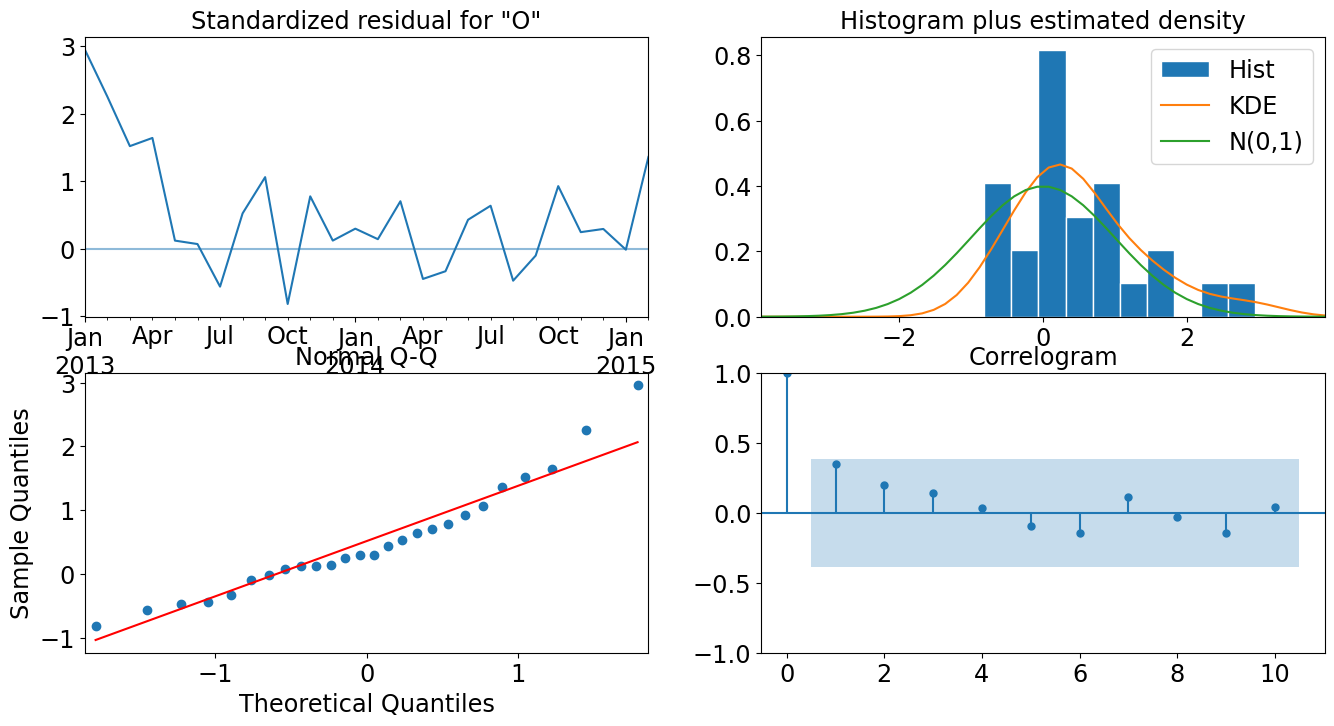

In [126]:
# Ensure frequency
train1 = train1.asfreq('MS')

# Fit the SARIMAX model with adjustments
mod = sm.tsa.statespace.SARIMAX(
    train1['Order_Demand_Scaled'],
    trend='n',
    order=(1, 1, 1),               # Try simpler order
    seasonal_order=(0, 1, 1, 12),  # Seasonal frequency set to 12
    enforce_stationarity=True,
    enforce_invertibility=True
)

# Fit the model with a robust optimizer
results = mod.fit(method='powell', disp=False)

# Check model summary
print(results.summary())

# Plot diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [127]:
train1

Order_Demand_Scaled  MA_3  MA_3_std Warehouse  DIFFERENCING
Month                                                                  
2011-12-01                    0   NaN       NaN    Whse_S            -0
2012-01-01                    0     0         0    Whse_S            -0
2012-02-01                    0     0         0    Whse_S            -0
2012-03-01                    0     0         0    Whse_S             0
2012-04-01                    0     0         0    Whse_S            -0
2012-05-01                    0     0         0    Whse_S             0
2012-06-01                    0     0         0    Whse_S            -0
2012-07-01                    0     0         0    Whse_S             0
2012-08-01                    0     0         0    Whse_S            -0
2012-09-01                    0     0         0    Whse_S            -0
2012-10-01                    0     0         0    Whse_S             0
2012-11-01                    0     0         0    Whse_S            -0
2012-12-01                    0     0         0    Whse_S             0
2013-01-01                    0     0         0    Whse_S             0
2013-02-01                    0     0         0    Whse_S            -0
2013-03-01                    0     0         0    Whse_S             0
2013-04-01                    0     0         0    Whse_S             0
2013-05-01                    0     0         0    Whse_S            -0
2013-06-01                    0     0         0    Whse_S             0
2013-07-01                    0     0         0    Whse_S            -0
2013-08-01                    0     0         0    Whse_S             0
2013-09-01                    0     0         0    Whse_S            -0
2013-10-01                    0     0         0    Whse_S            -0
2013-11-01                    0     0         0    Whse_S             0
2013-12-01                    0     0         0    Whse_S            -0
2014-01-01                    0     0         0    Whse_S             0
2014-02-01                    0     0         0    Whse_S            -0
2014-03-01                    0     0         0    Whse_S             0
2014-04-01                    0     0         0    Whse_S            -0
2014-05-01                    0     0         0    Whse_S            -0
2014-06-01                    0     0         0    Whse_S             0
2014-07-01                    0     0         0    Whse_S            -0
2014-08-01                    0     0         0    Whse_S            -0
2014-09-01                    0     0         0    Whse_S             0
2014-10-01                    0     0         0    Whse_S             0
2014-11-01                    0     0         0    Whse_S             0
2014-12-01                    0     0         0    Whse_S            -0
2015-01-01                    0     0         0    Whse_S             0
2015-02-01                    0     0         0    Whse_S             0

Forecasting starting from: 2015-02-01 00:00:00

Forecasted Values:
2015-03-01   0
2015-04-01   0
2015-05-01   0
2015-06-01   0
2015-07-01   0
2015-08-01   0
2015-09-01   0
2015-10-01   0
2015-11-01   0
2015-12-01   0
2016-01-01   0
2016-02-01   0
2016-03-01   0
2016-04-01   0
2016-05-01   0
2016-06-01   0
2016-07-01   0
2016-08-01   0
2016-09-01   0
2016-10-01   0
2016-11-01   0
2016-12-01   0
2017-01-01   0
2017-02-01   0
Freq: MS, Name: predicted_mean, dtype: float64


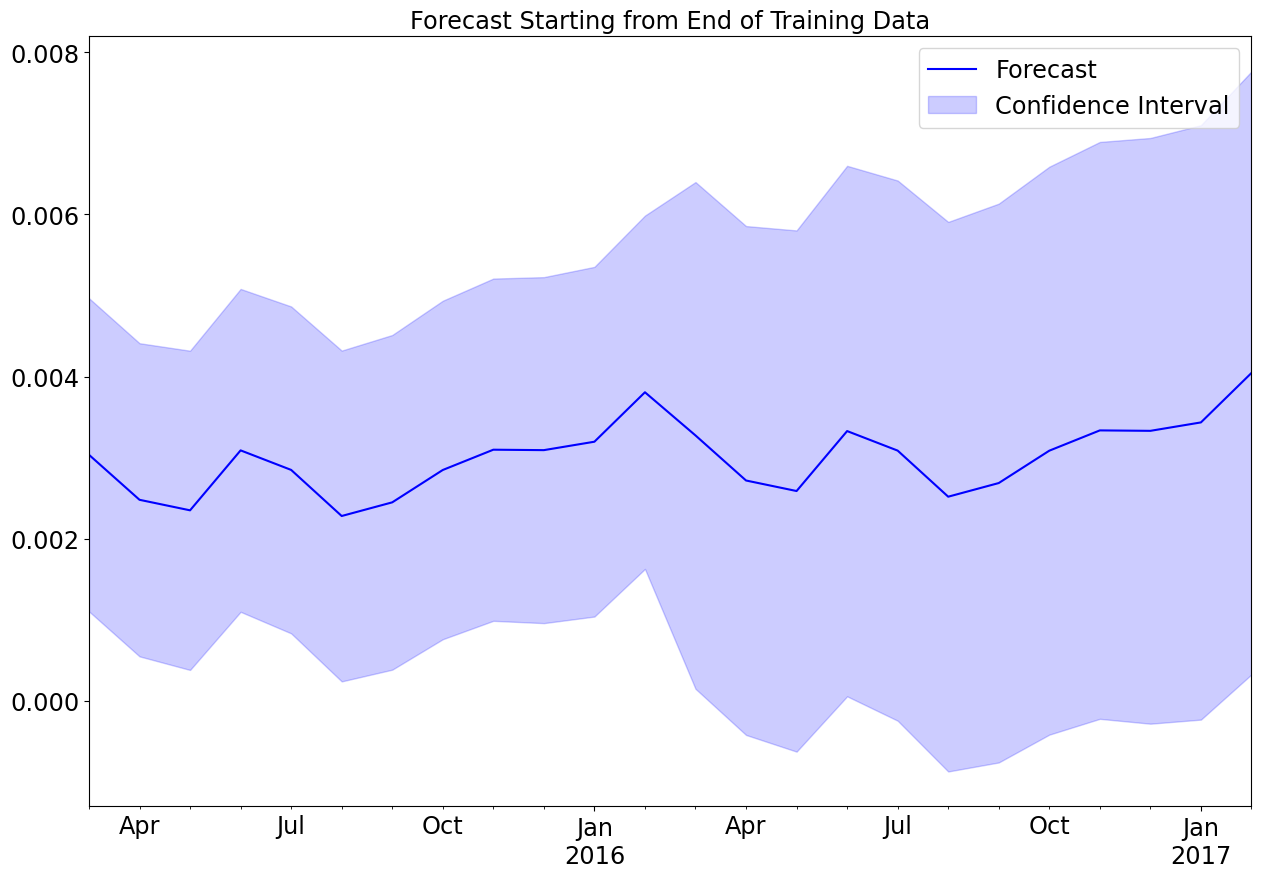

In [129]:
# Get the last date of the training data
forecast_start = train1.index[-1]
print(f"Forecasting starting from: {forecast_start}")

# Forecast for the next 24 months (or adjust as needed)
forecast_steps = 24  # Number of steps into the future
pred_1 = results.get_forecast(steps=forecast_steps)

# Get confidence intervals for the forecast
pred2_ci = pred_1.conf_int()

# Forecasted values
forecasted_values = pred_1.predicted_mean
print("\nForecasted Values:")
print(forecasted_values)

# Plot the forecast and confidence intervals
forecasted_values.plot(label='Forecast', color='blue')
plt.fill_between(pred2_ci.index, 
                 pred2_ci.iloc[:, 0], 
                 pred2_ci.iloc[:, 1], 
                 color='blue', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.title("Forecast Starting from End of Training Data")
plt.show()


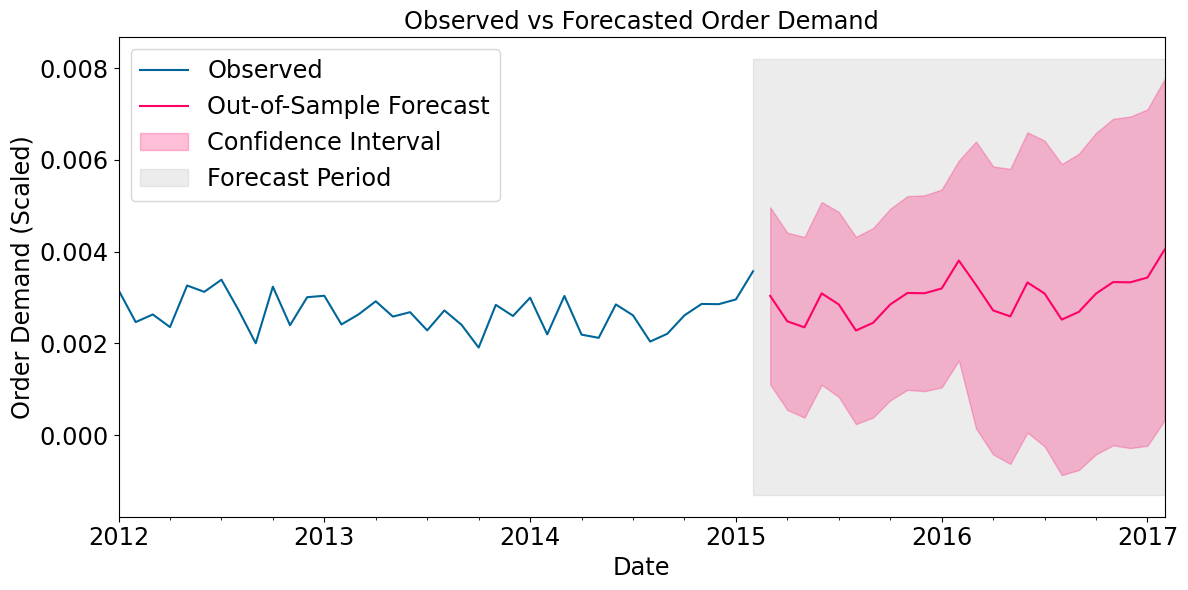

In [130]:
import matplotlib.pyplot as plt

# Plot the observed data
ax = train1['Order_Demand_Scaled']['2012':].plot(label='Observed', color='#006699', figsize=(12, 6))

# Plot the forecasted values
pred_1.predicted_mean.plot(ax=ax, label='Out-of-Sample Forecast', color='#ff0066')

# Plot the confidence intervals for the forecast
ax.fill_between(
    pred2_ci.index,
    pred2_ci.iloc[:, 0],  # Lower bound
    pred2_ci.iloc[:, 1],  # Upper bound
    color='#ff0066', alpha=0.25, label='Confidence Interval'
)

# Highlight the forecast period with a grey band
ax.fill_betweenx(
    ax.get_ylim(),
    pd.to_datetime(train1.index[-1]),  # Start of the forecast
    pred2_ci.index[-1],               # End of the forecast
    color='grey', alpha=0.15, zorder=-1, label='Forecast Period'
)

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Order Demand (Scaled)')
ax.set_title('Observed vs Forecasted Order Demand')
ax.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
